
# Questão 1

In [1]:
# Importanto as bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
import warnings
warnings.simplefilter("ignore")

In [2]:
# Lendo os arquivos:

diretorio =  # coloque o diretorio aqui
df = pd.read_csv(diretorio + 'brasileiro2018.csv')
df2 = pd.read_csv(diretorio + 'classificacao2018.csv')

In [3]:
# Vendo as colunas do dataframe: 
df.head(10)
# casa = time dono do mando de campo
# gols_c = gols do time da casa
# visitante = time visitante
# gols_v = gols do time visitante
# pp = público presente
# iv = ingressos vendidos
# iv% = porcentagem de ingressos vendidos
# renda_L = renda líquida do jogo
# renda_B = renda bruta do jogo

,#casa,#gols_c,#gols_v,#visitante,#pp,#iv,#iv%,#renda_L,#renda_B
0,São Paulo-SP,1,0,Paraná-PR,11.327,15.437,73,"R$ 140.284,04","R$ 338.295,00"
1,Botafogo-RJ,1,1,Palmeiras-SP,7.020,7.515,93,"R$ -200.131,47","R$ 207.880,00"
2,Athletico Paranaense-PR,5,1,Chapecoense-SC,8.395,8.395,100,"R$ -77.837,78","R$ 130.015,00"
3,Internacional-RS,2,0,Bahia-BA,18.460,18.460,100,"R$ 524.782,95","R$ 796.275,00"
4,Corinthians-SP,2,1,Fluminense-RJ,28.777,28.777,100,"R$ 871.251,02","R$ 1.372.018,06"
5,Vasco-RJ,2,1,Atlético Mineiro-MG,6.349,7.606,84,"R$ -48.726,86","R$ 176.600,00"
6,América Mineiro-MG,3,0,Sport-PE,3.230,3.608,90,"R$ -56.296,29","R$ 36.293,00"
7,Santos-SP,2,0,Ceará-CE,12.268,12.268,100,"R$ 139.766,13","R$ 526.550,00"
8,Vitória-BA,2,2,Flamengo-RJ,12.669,13.981,91,"R$ 133.166,18","R$ 238.994,00"
9,Cruzeiro-MG,0,1,Grêmio-RS,15.252,15.255,100,"R$ 279.460,67","R$ 418.305,00"


In [4]:
# Vendo as colunas do dataframe:
df2
# P = pontos
# J = jogos
# V = vitórias
# E = empates
# D = derrotas
# GP = gols pró
# GC = gols contra
# SG = saldo de gols

,time,P,J,V,E,D,GP,GC,SG
0,Palmeiras,80,38,23,11,4,64,26,38
1,Flamengo,72,38,21,9,8,59,29,30
2,Internacional,69,38,19,12,7,51,29,22
3,Grêmio,66,38,18,12,8,48,27,21
4,São Paulo,63,38,16,15,7,46,34,12
5,Atlético-MG,59,38,17,8,13,56,43,13
6,Athletico,57,38,16,9,13,54,37,17
7,Cruzeiro,53,38,14,11,13,34,34,0
8,Botafogo,51,38,13,12,13,38,46,-8
9,Santos,50,38,13,11,14,46,40,6


# Ajustando a tabela de jogos

In [5]:
# Remover os # do nome das colunas:

df.rename(columns=lambda x: x[1:], inplace=True)

In [6]:
# Removendo o estado do nome dos times:

df['casa'] = [x.split('-')[0] for x in df['casa']]
df['visitante'] = [x.split('-')[0] for x in df['visitante']]

In [7]:
# Removendo o ponto nos números maiores que 1000 no público presente e ingressos vendidos:

df['pp'] = [1000*x if x < 100 else x for x in df['pp']]
df['iv'] = [1000*x if x < 100 else x for x in df['iv']]

In [8]:
# Convertendo os valores de renda líquida e bruta para floats:

df['renda_L'] = df['renda_L'].apply(lambda x:(x.replace('R$ ', '')))
df['renda_L'] = df['renda_L'].apply(lambda x:(x.replace('.', '')))
df['renda_B'] = df['renda_B'].apply(lambda x:(x.replace('R$ ', '')))
df['renda_B'] = df['renda_B'].apply(lambda x:(x.replace('.', '')))
df['renda_L'] = df['renda_L'].apply(lambda x:(x.replace(',', '.')))
df['renda_B'] = df['renda_B'].apply(lambda x:(x.replace(',', '.')))
df['renda_L'] = [float(x) for x in df['renda_L']]
df['renda_B'] = [float(x) for x in df['renda_B']]

In [9]:
# Criando uma coluna resultado, na qual:
# E representa empate;
# V representa vitória do visitante;
# C representa vitória do mandante.

df.loc[df['gols_c'] == df['gols_v'], 'resultado'] = 'E'
df.loc[df['gols_c'] > df['gols_v'], 'resultado'] = 'C'
df.loc[df['gols_c'] < df['gols_v'], 'resultado'] = 'V'

In [10]:
df.head(10)

,casa,gols_c,gols_v,visitante,pp,iv,iv%,renda_L,renda_B,resultado
0,São Paulo,1,0,Paraná,11327.0,15437.0,73,140284.04,338295.00,C
1,Botafogo,1,1,Palmeiras,7020.0,7515.0,93,-200131.47,207880.00,E
2,Athletico Paranaense,5,1,Chapecoense,8395.0,8395.0,100,-77837.78,130015.00,C
3,Internacional,2,0,Bahia,18460.0,18460.0,100,524782.95,796275.00,C
4,Corinthians,2,1,Fluminense,28777.0,28777.0,100,871251.02,1372018.06,C
5,Vasco,2,1,Atlético Mineiro,6349.0,7606.0,84,-48726.86,176600.00,C
6,América Mineiro,3,0,Sport,3230.0,3608.0,90,-56296.29,36293.00,C
7,Santos,2,0,Ceará,12268.0,12268.0,100,139766.13,526550.00,C
8,Vitória,2,2,Flamengo,12669.0,13981.0,91,133166.18,238994.00,E
9,Cruzeiro,0,1,Grêmio,15252.0,15255.0,100,279460.67,418305.00,V


# Visualizando a influência de ser mandante do jogo

In [12]:
# Retorna dataframe com as estatísticas dos jogos:

def acha_estatisticas_resultado(df):
    return pd.DataFrame(data = [len(df[df.resultado == 'C']),
                                 len(df[df.resultado == 'V']),
                                 len(df[df.resultado == 'E'])],
                        index = ['Vitórias do mandante', 'Vitórias do visitante', 'Empates'],
                        columns =['Campeonato de 2018']).T

In [13]:
estatistica=acha_estatisticas_resultado(df)
estatistica

,Vitórias do mandante,Vitórias do visitante,Empates
Campeonato de 2018,202,68,110


Text(0, 0.5, 'Ocorrências')

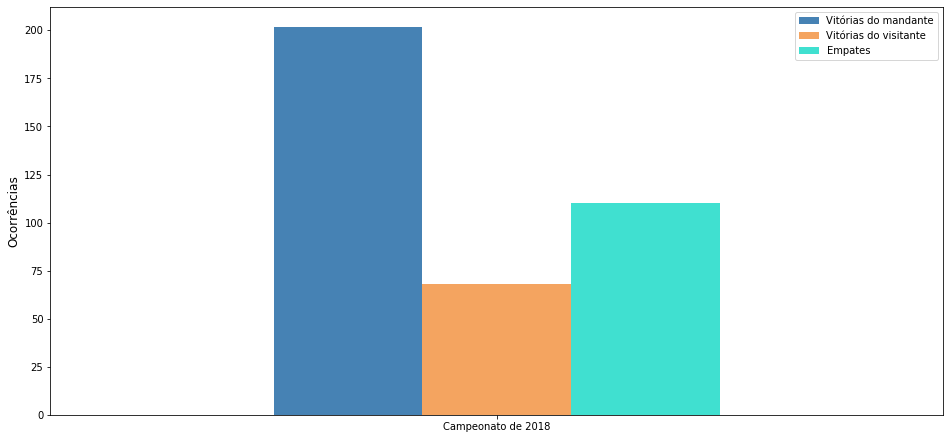

In [14]:
# Plotando em barras:

ax = estatistica.plot(kind='bar', color = ['steelblue','sandybrown', 'turquoise'], figsize = [16,7.5])
plt.xticks(rotation=0)
ax.set_ylabel('Ocorrências', size=12)

In [15]:
# Dataframe com resultados percentuais:

estatistica_percent = estatistica.T

for coluna in estatistica_percent.columns:
    estatistica_percent[coluna] = (estatistica_percent[coluna] * 100) / 380  # Número de jogos em uma ano

# Renomeando colunas
estatistica_percent.rename(index={'Vitórias do mandante':'Mandante', 'Vitórias do visitante':'Visitante', 'Empate':'Empate'}, inplace=True)

# Printar dataframe final
estatistica_percent

,Campeonato de 2018
Mandante,53.157895
Visitante,17.894737
Empates,28.947368


Text(0.5, 1.0, 'Resultados percentuais')

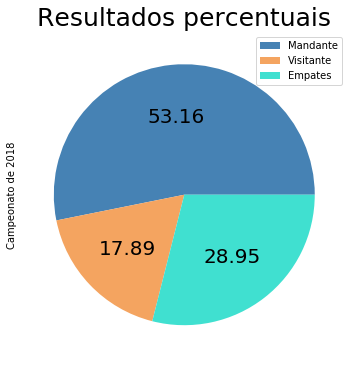

In [16]:
ax = estatistica_percent.plot(kind='pie', figsize =[6,6],autopct='%.2f', y='Campeonato de 2018', fontsize =20, labels = None,
                          legend = True, colors = ['steelblue','sandybrown', 'turquoise'])
ax.set_title('Resultados percentuais', size=25)

Percebe-se, então, que os times mandantes dificilmente são derrotados.

# Influência da diferença de pontos, isto é, da classificação

In [17]:
# Função para achar os times do campeonato:

def acha_times(df):
    times = {}
    for i in df.groupby('casa').mean().T.columns:
        times[i] = []
    return times

# Retorna os pontos de uma partida:

def acha_pontos(resultado):
    if resultado == 'G':
        return 3
    elif resultado == 'E':
        return 1
    else:
        return 0

# Retorna um dataframe com os resultados ('G' para vitória e 'P' para derrota e 'E' para empate):

def acha_resultado(df):
    times=acha_times(df)
    for i in range(len(df)):
        if df.iloc[i].resultado == 'C':
            times[df.iloc[i].casa].append('G')
            times[df.iloc[i].visitante].append('P')
        elif df.iloc[i].resultado == 'V':
            times[df.iloc[i].visitante].append('G')
            times[df.iloc[i].casa].append('P')
        else:
            times[df.iloc[i].visitante].append('E')
            times[df.iloc[i].casa].append('E')
    return pd.DataFrame(data=times, index = [i for i in range(1,39)]).T    

# Retorna os pontos acumulados:

def acha_pontos_acumulados(resultado):
    pontos_acumulados = resultado.applymap(acha_pontos)
    for i in range(2,39):
        pontos_acumulados[i] = pontos_acumulados[i] + pontos_acumulados[i-1]
        
    pontos_acumulados.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return pontos_acumulados

In [18]:
# Dataframe com o número de pontos acumulados:

resultado = acha_resultado(df)
pontos_acumulados = acha_pontos_acumulados(resultado)
pontos_acumulados.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
América Mineiro,0,3,3,6,6,7,10,10,10,13,...,33,34,34,34,34,34,37,37,40,40
Athletico Paranaense,0,3,4,5,5,5,5,6,9,9,...,39,40,43,43,46,47,50,53,54,57
Atlético Mineiro,0,0,3,6,7,10,13,13,13,14,...,46,46,46,46,47,50,53,56,56,59
Bahia,0,0,3,4,4,5,5,8,8,8,...,34,37,37,40,41,44,44,47,47,48
Botafogo,0,1,2,5,5,8,8,9,9,12,...,35,35,35,38,41,44,47,48,51,51


In [19]:
# Achar a diferença de pontos entre dois times em uma dada rodada:

def acha_diferença(mandante, visitante, rodada, pontos_acumulados):
    pts_mandante = pontos_acumulados[rodada-1].loc[mandante]
    pts_visitante = pontos_acumulados[rodada-1].loc[visitante]
    diff = pts_mandante - pts_visitante
    return diff

# Criar um dicionário com todas as diferenças e resultados em forma de string durante o campeonato:

def diferença_pontos(df, pontos_acumulados):
    diferença_pontos_geral = {}
    jogos = 0
    for rodada in range(1,39):
        diferença_pontos = {}
        for jogo in range(jogos,jogos+10):
            mandante = df.iloc[jogo].casa
            visitante = df.iloc[jogo].visitante
            res = df.iloc[jogo].resultado
            dif = acha_diferença(mandante,visitante,rodada,pontos_acumulados)
            if res == 'C':
                if dif not in diferença_pontos:
                    diferença_pontos[dif] = ['VM']                # VM = vitória do mandante
                else:
                    diferença_pontos[dif].append('VM')               
            elif res == 'V':
                if dif not in diferença_pontos:
                    diferença_pontos[dif] = ['VV']            # VV = vitória do visitante
                else:
                    diferença_pontos[dif].append('VV')                             
            else:
                if dif not in diferença_pontos:
                    diferença_pontos[dif] = ['E']                 # E = empate
                else:
                    diferença_pontos[dif].append('E')                     
        diferença_pontos_geral[rodada] = diferença_pontos
        jogos += 10
    return diferença_pontos_geral

diferença_pontos = diferença_pontos(df, pontos_acumulados)

diferenca_rodada = {}

# Criar um dicionário com todas as diferenças e resultados em forma de número durante o campeonato

for rodada in diferença_pontos.keys():
    diferencas = {}
    for i in diferença_pontos[rodada].keys():
        vitoria_mandante = 0
        vitoria_visitante = 0
        empate = 0
        resultado = [0,0,0]
        
        for resultado in diferença_pontos[rodada][i]:
            jogos = len(diferença_pontos[rodada][i])
            if resultado == 'VM':
                vitoria_mandante += 1
            elif resultado == 'VV':
                vitoria_visitante += 1
            else:
                empate += 1
        
        diferencas[i] = [vitoria_mandante, vitoria_visitante, empate]
    diferenca_rodada[rodada] = diferencas

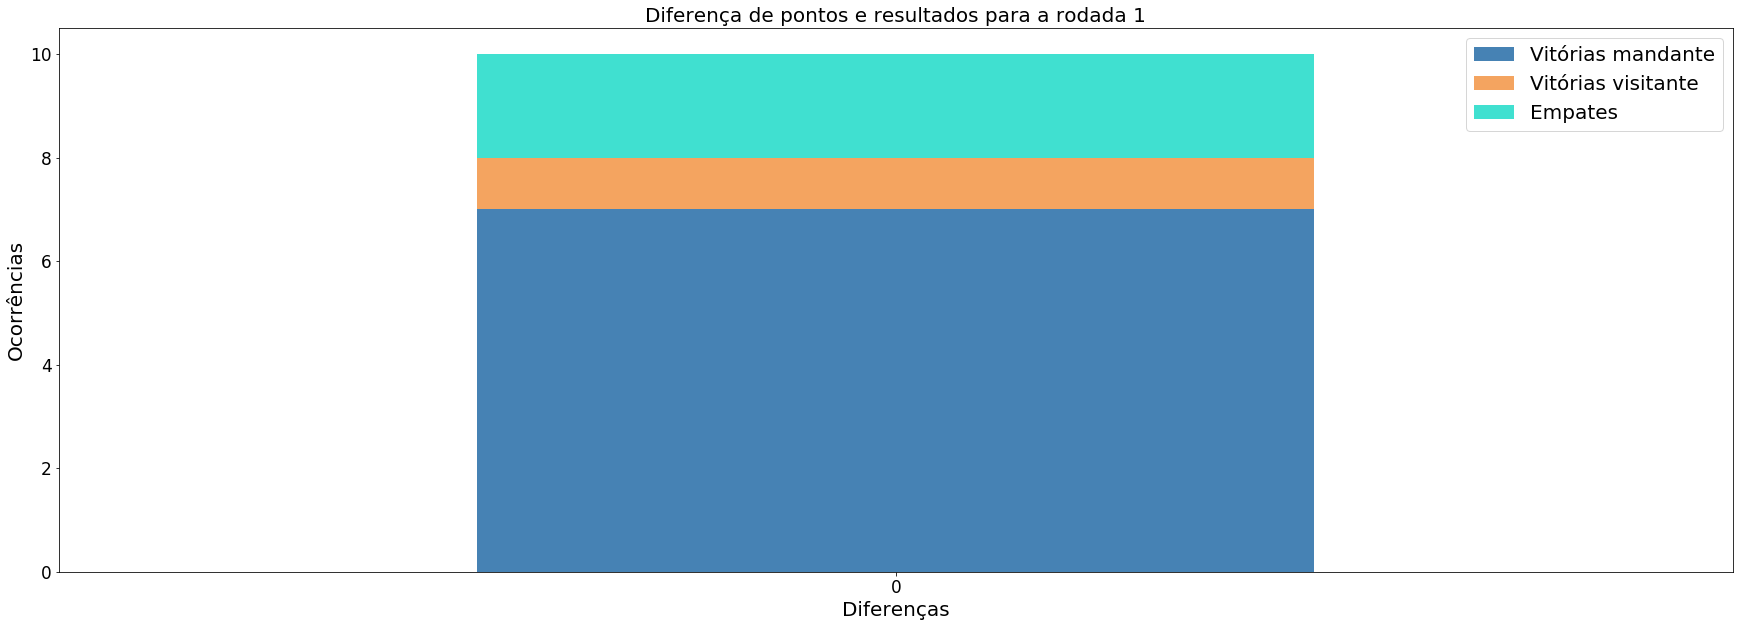

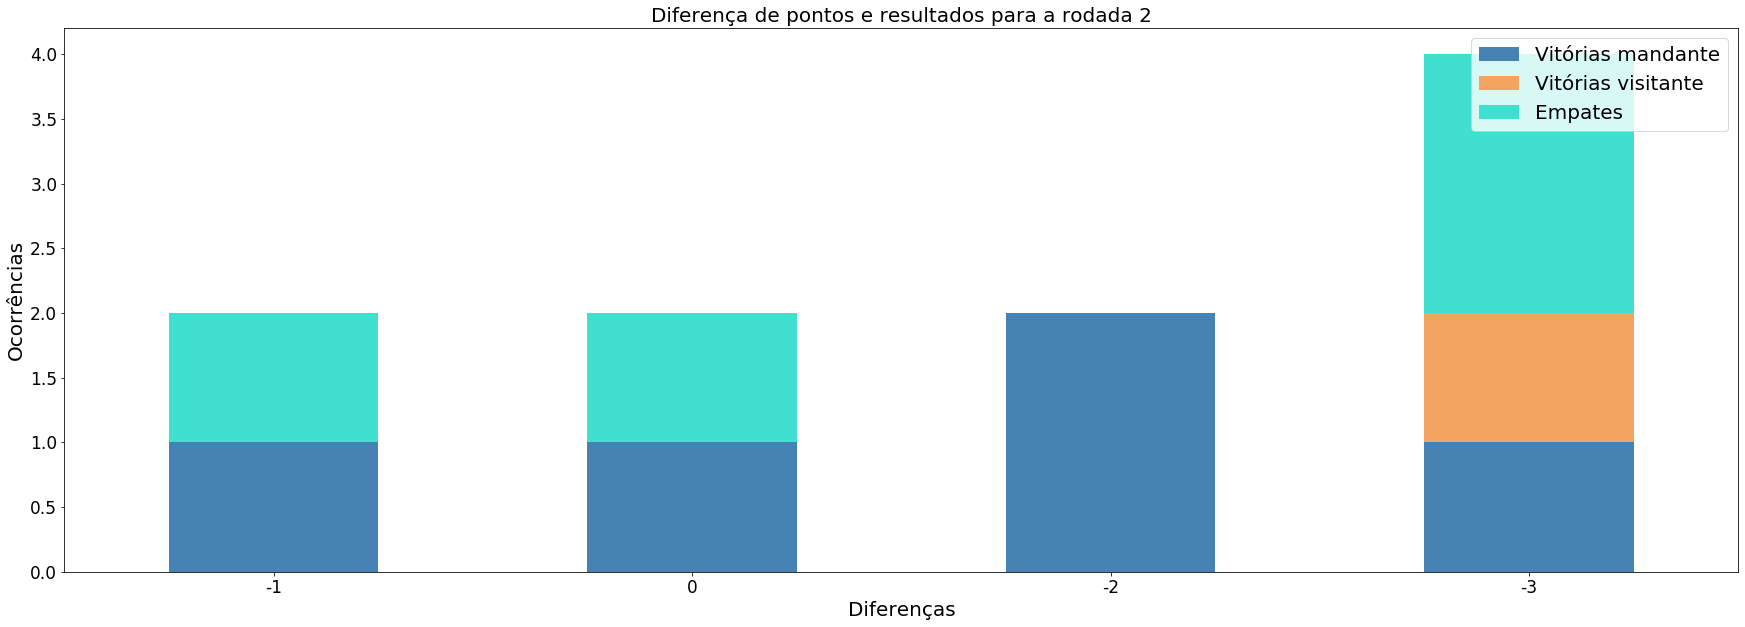

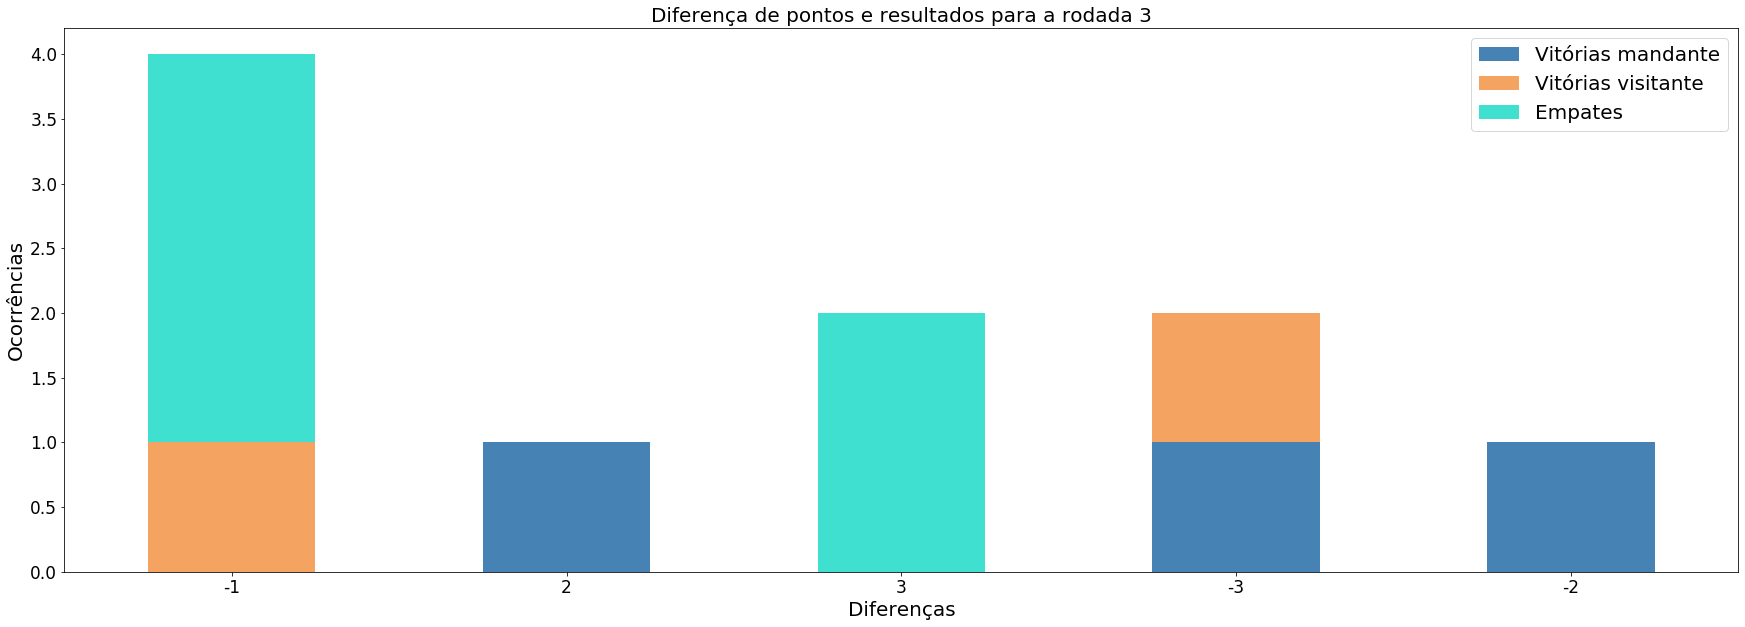

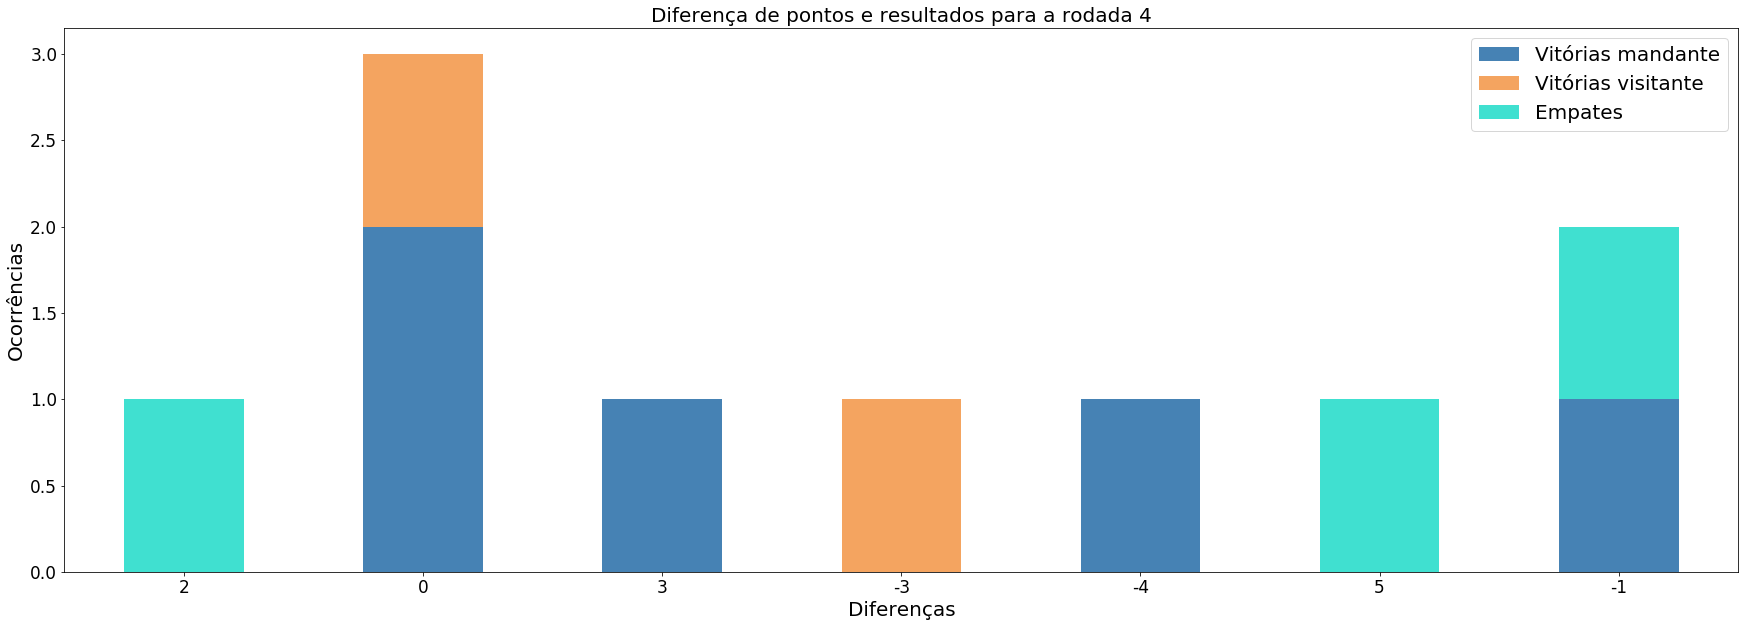

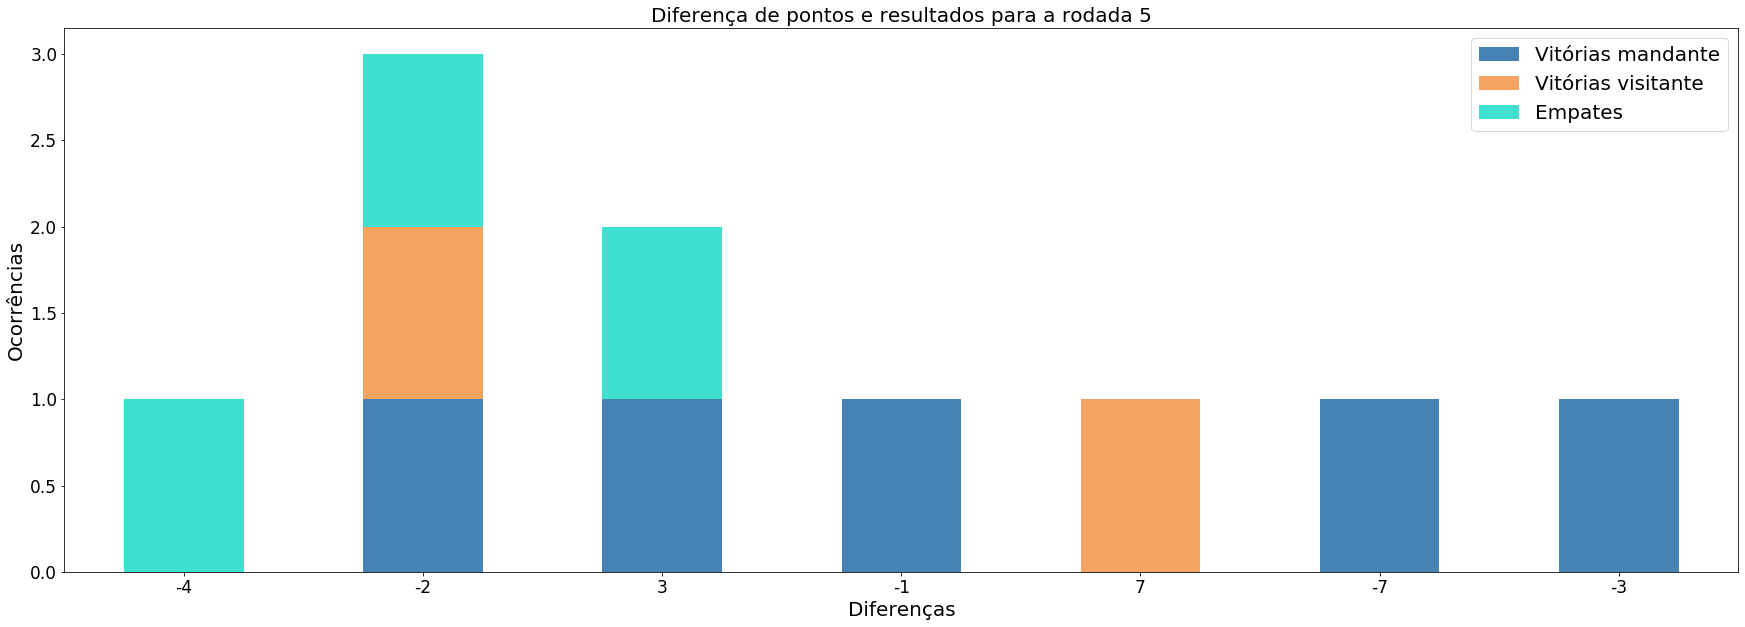

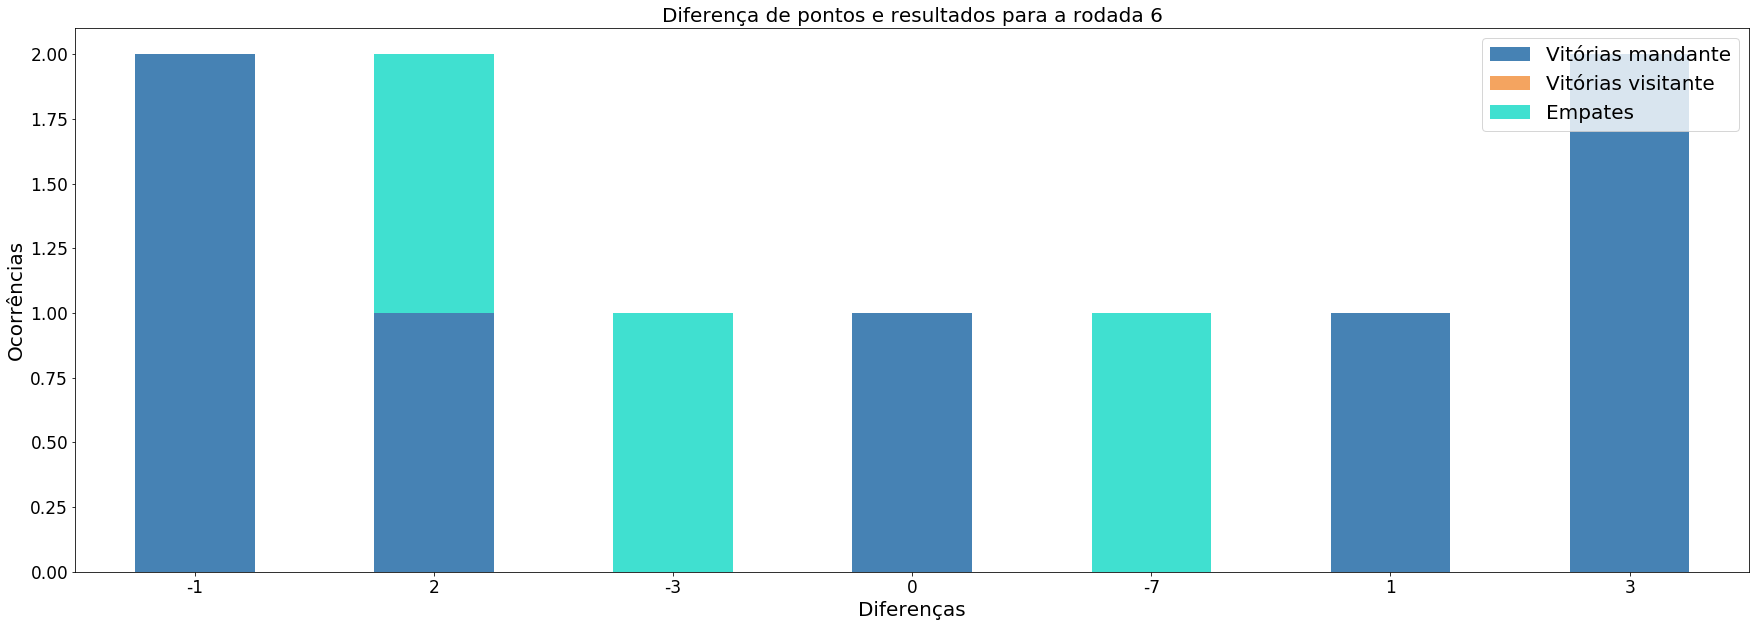

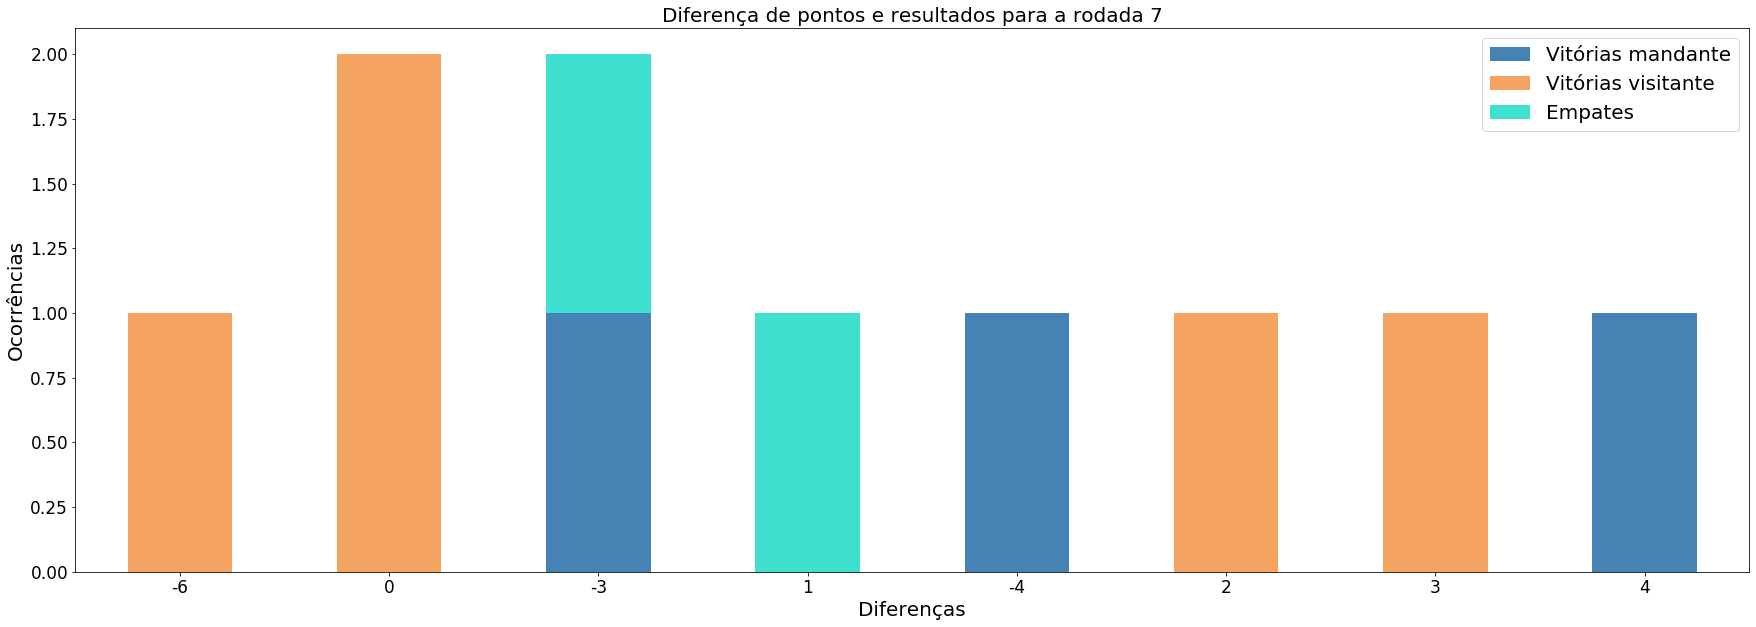

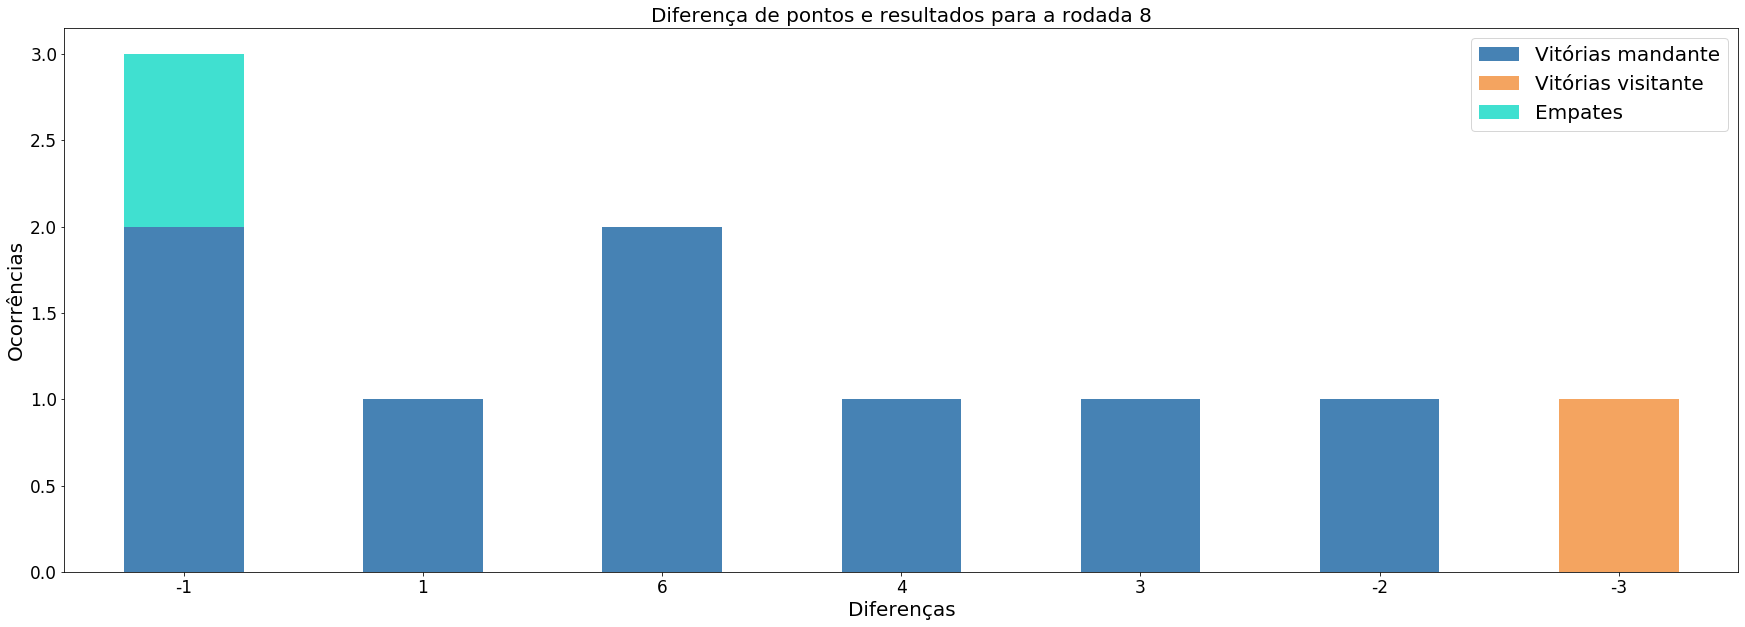

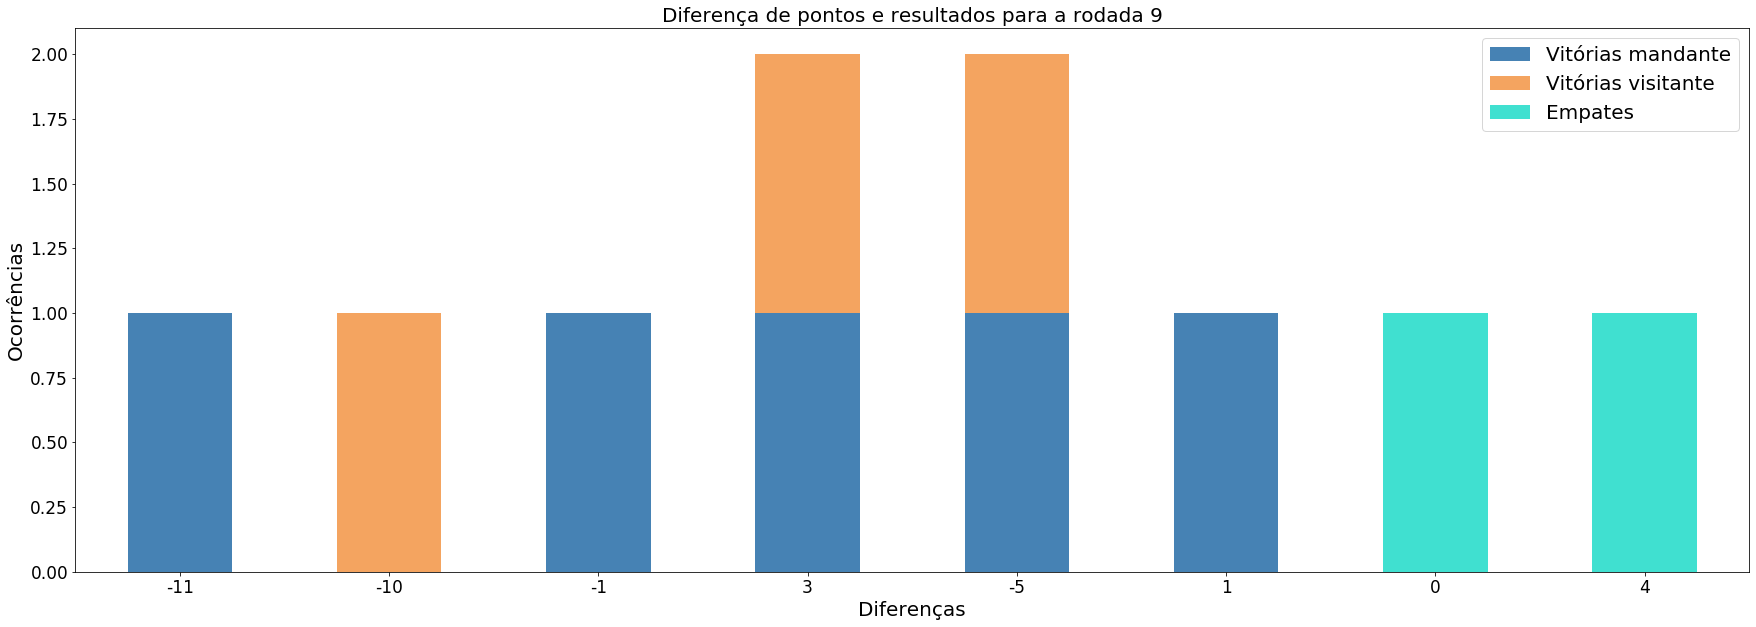

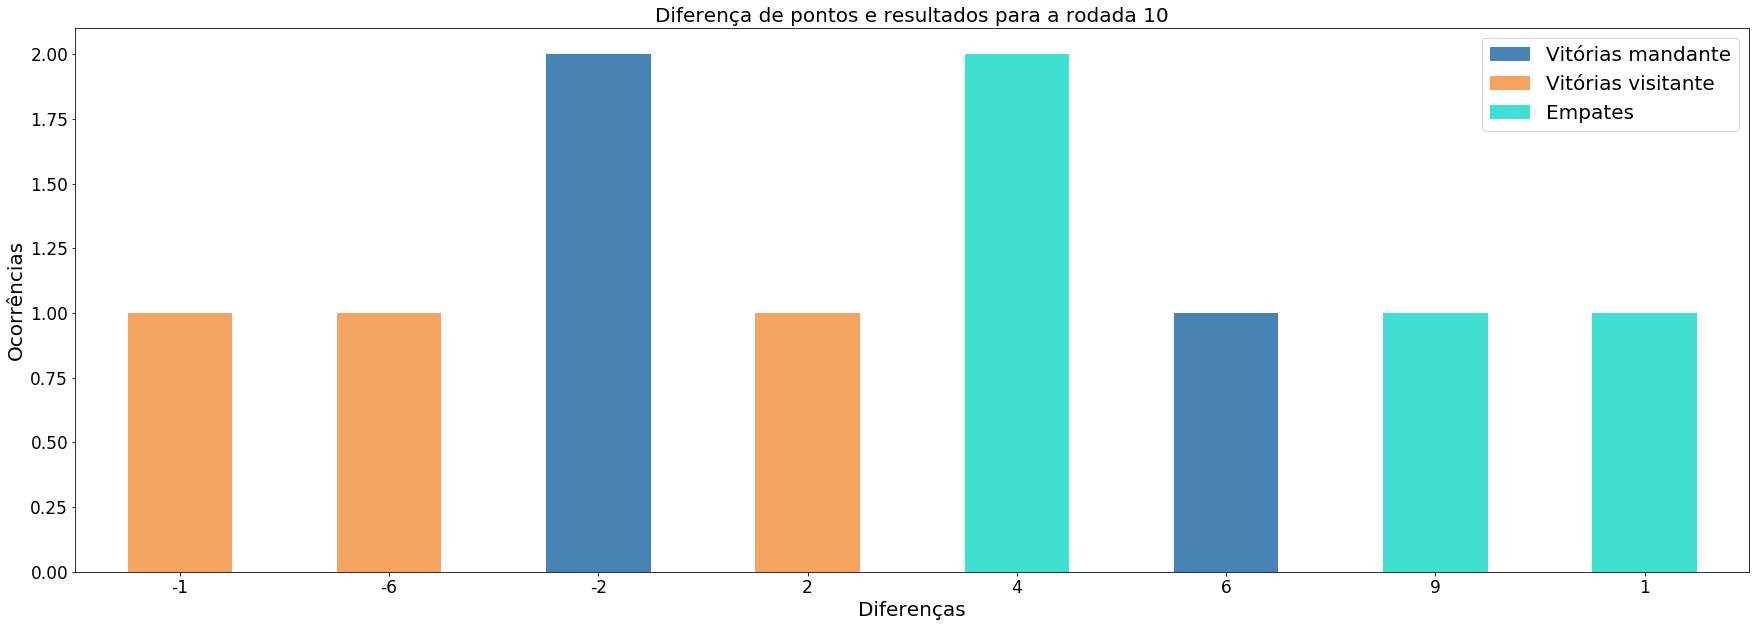

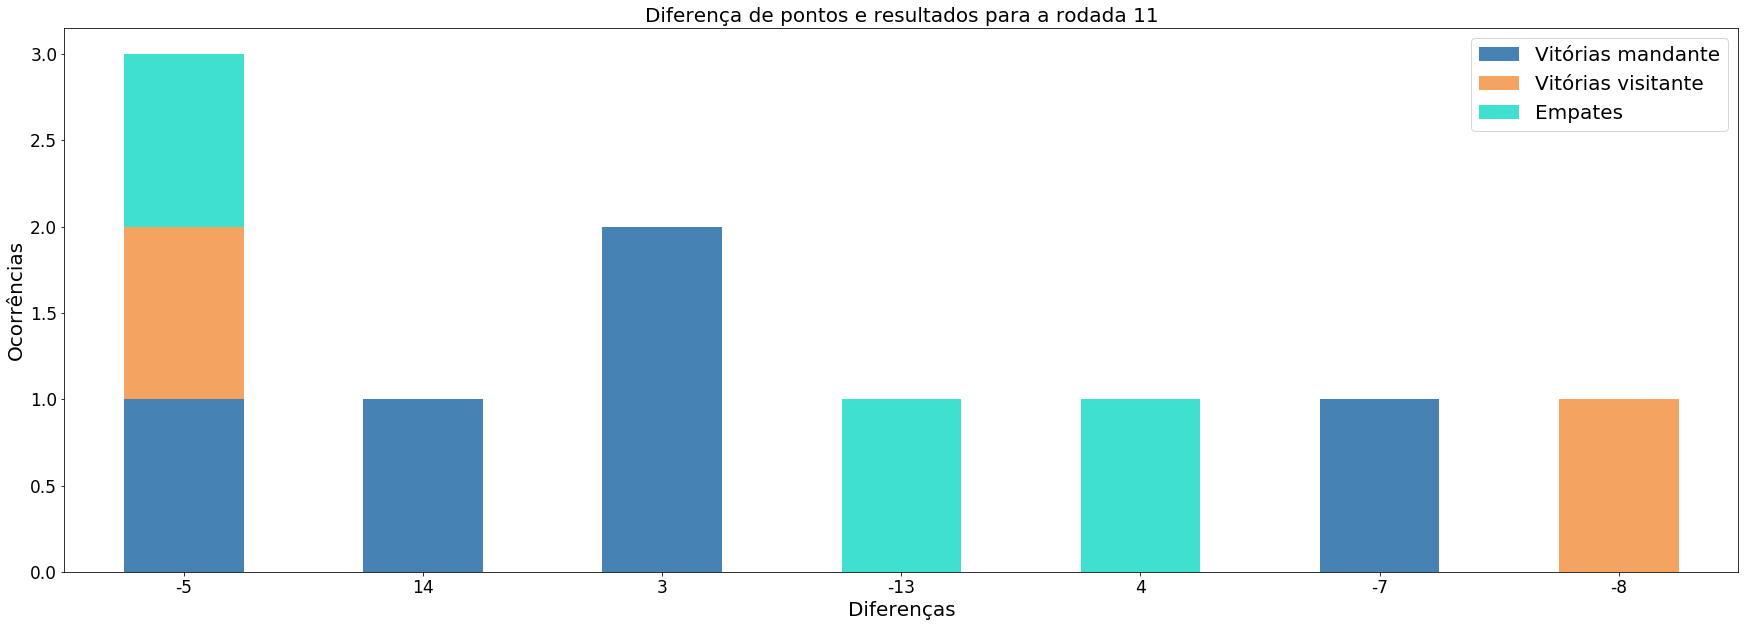

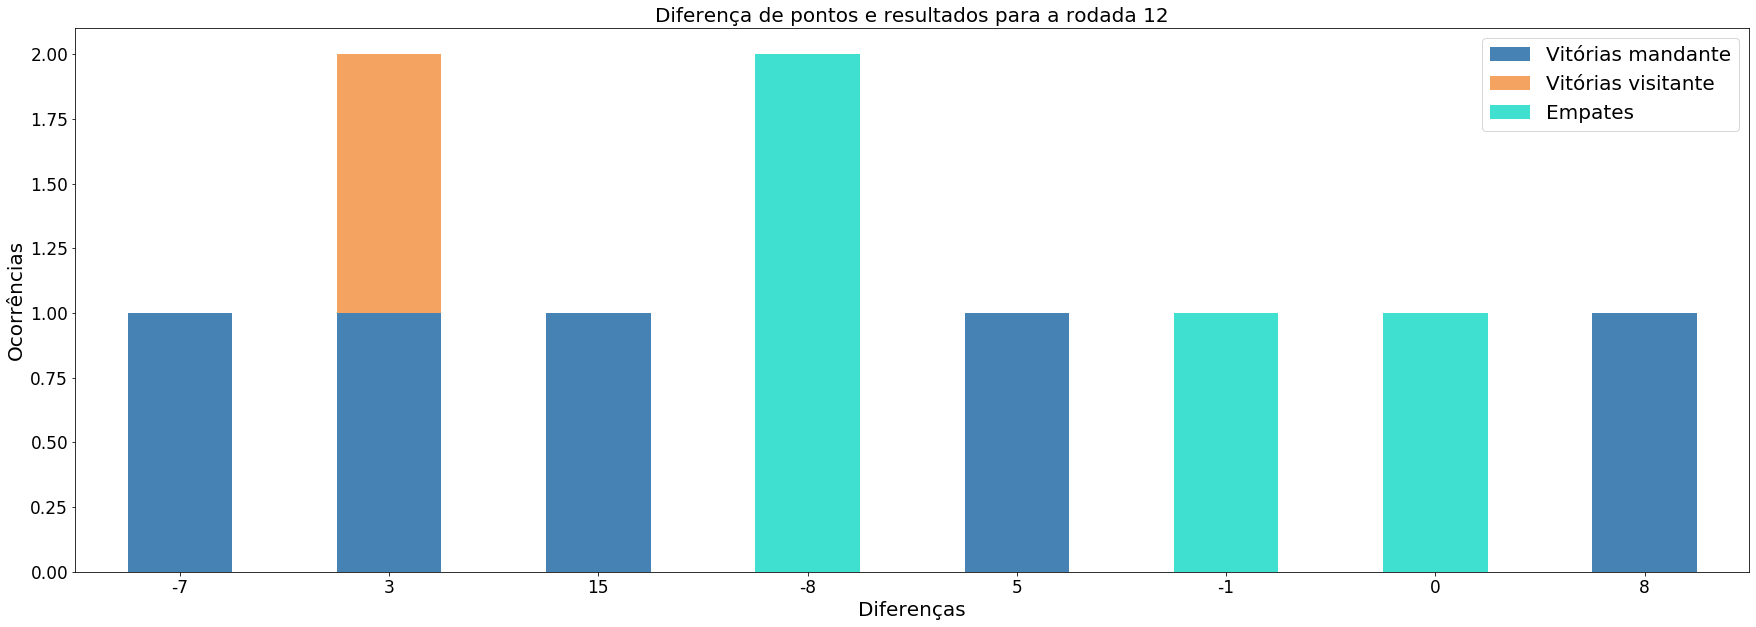

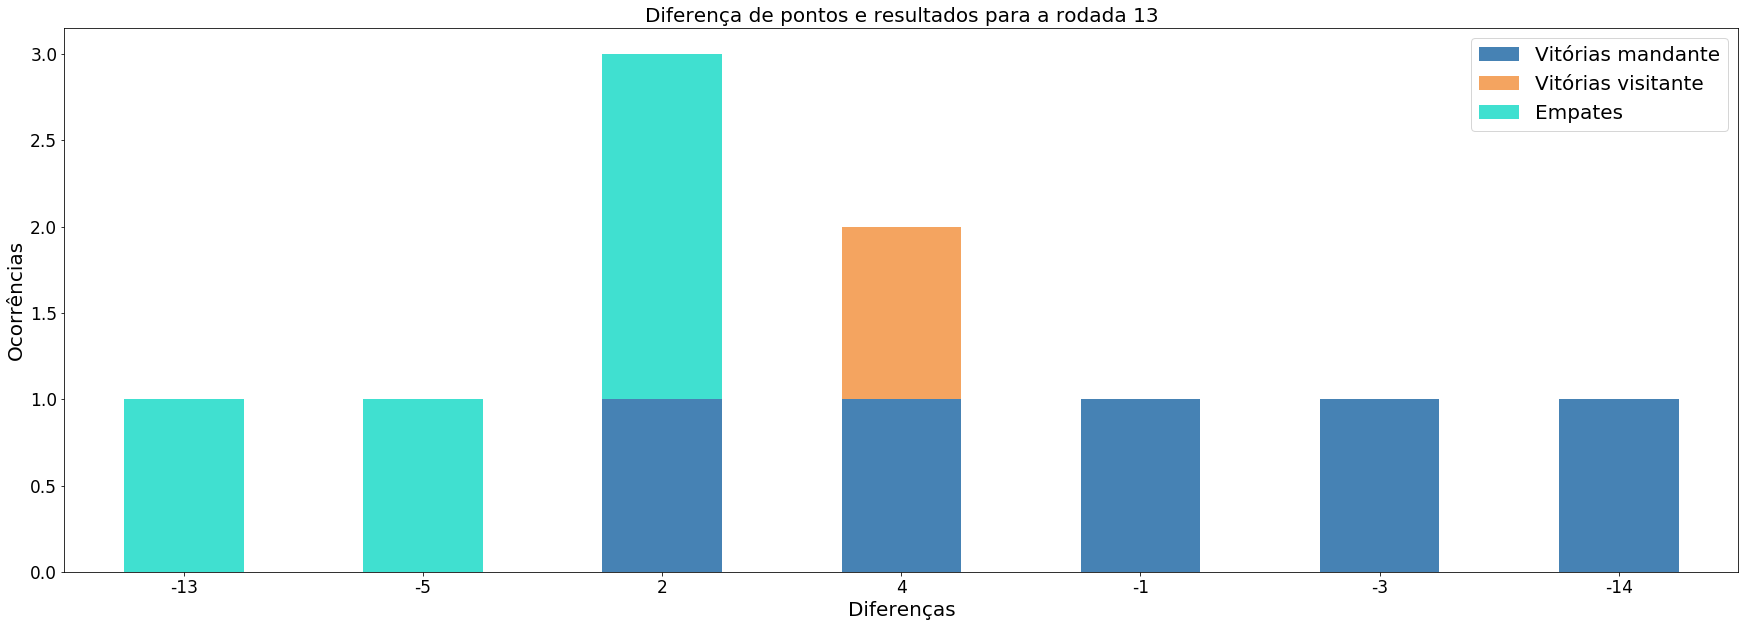

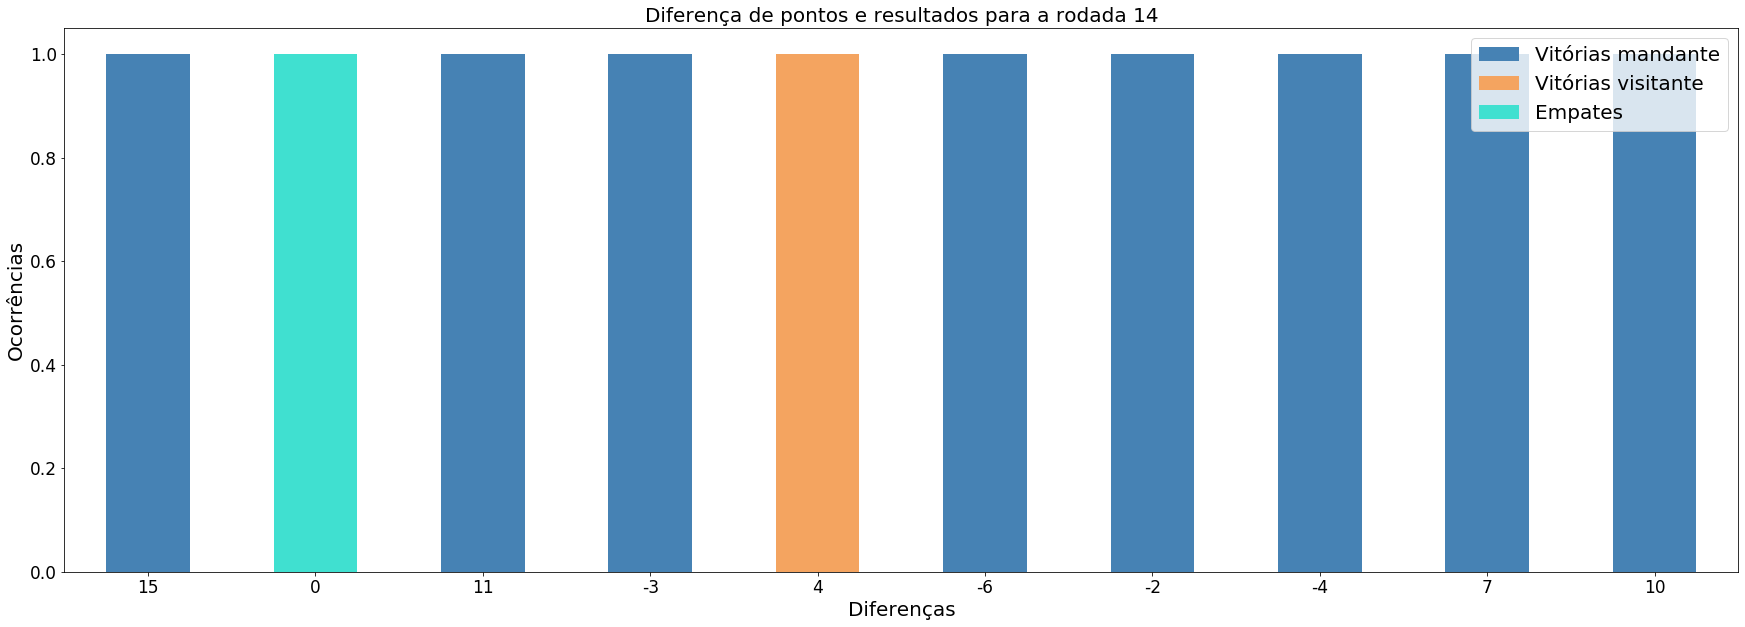

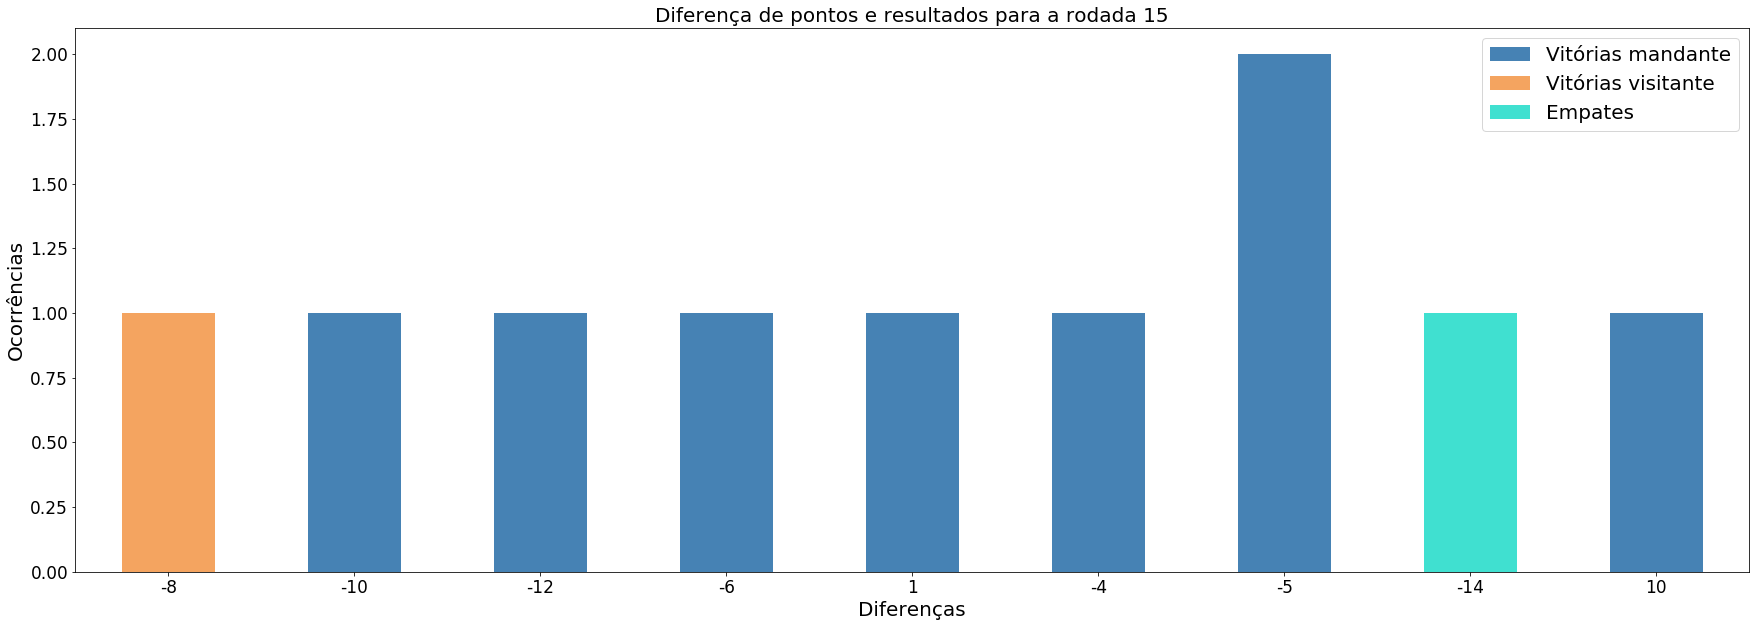

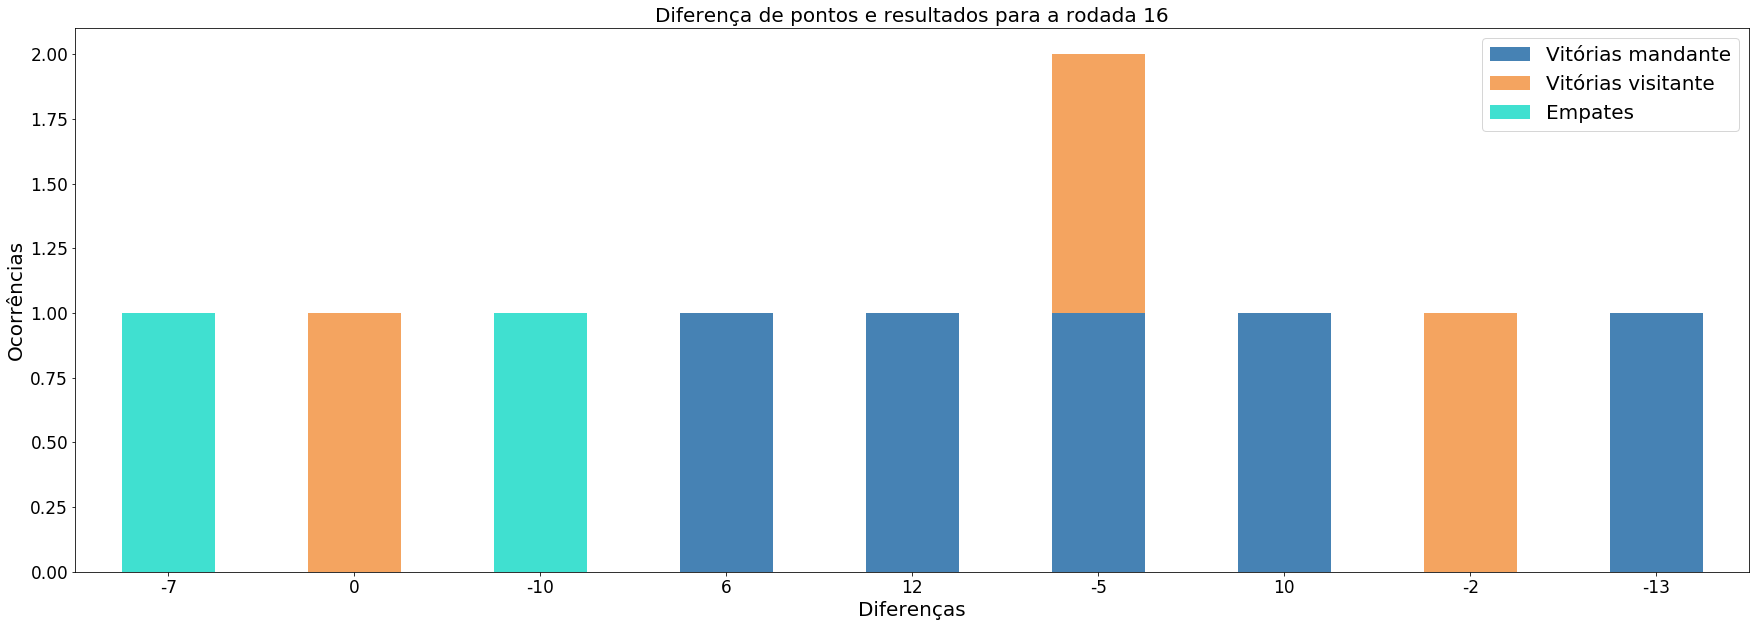

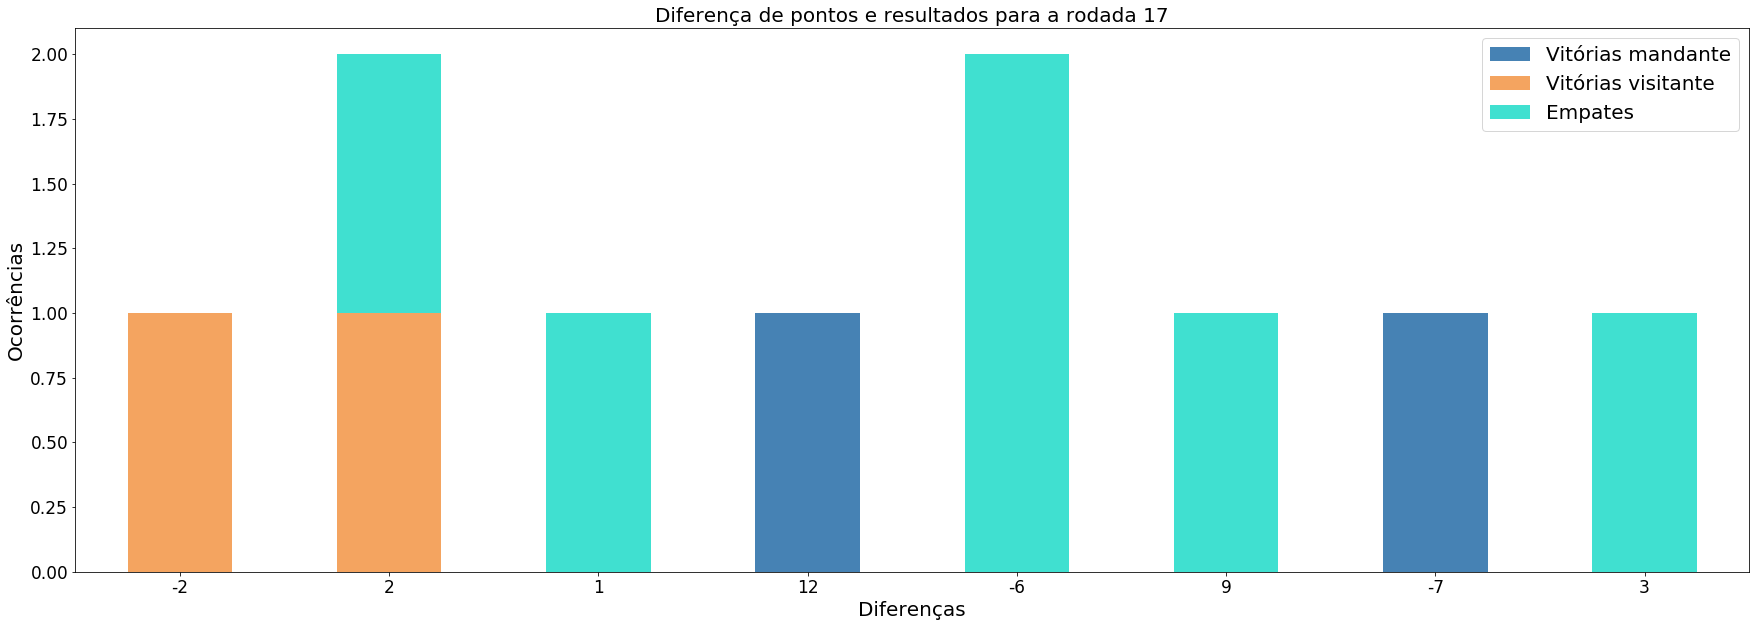

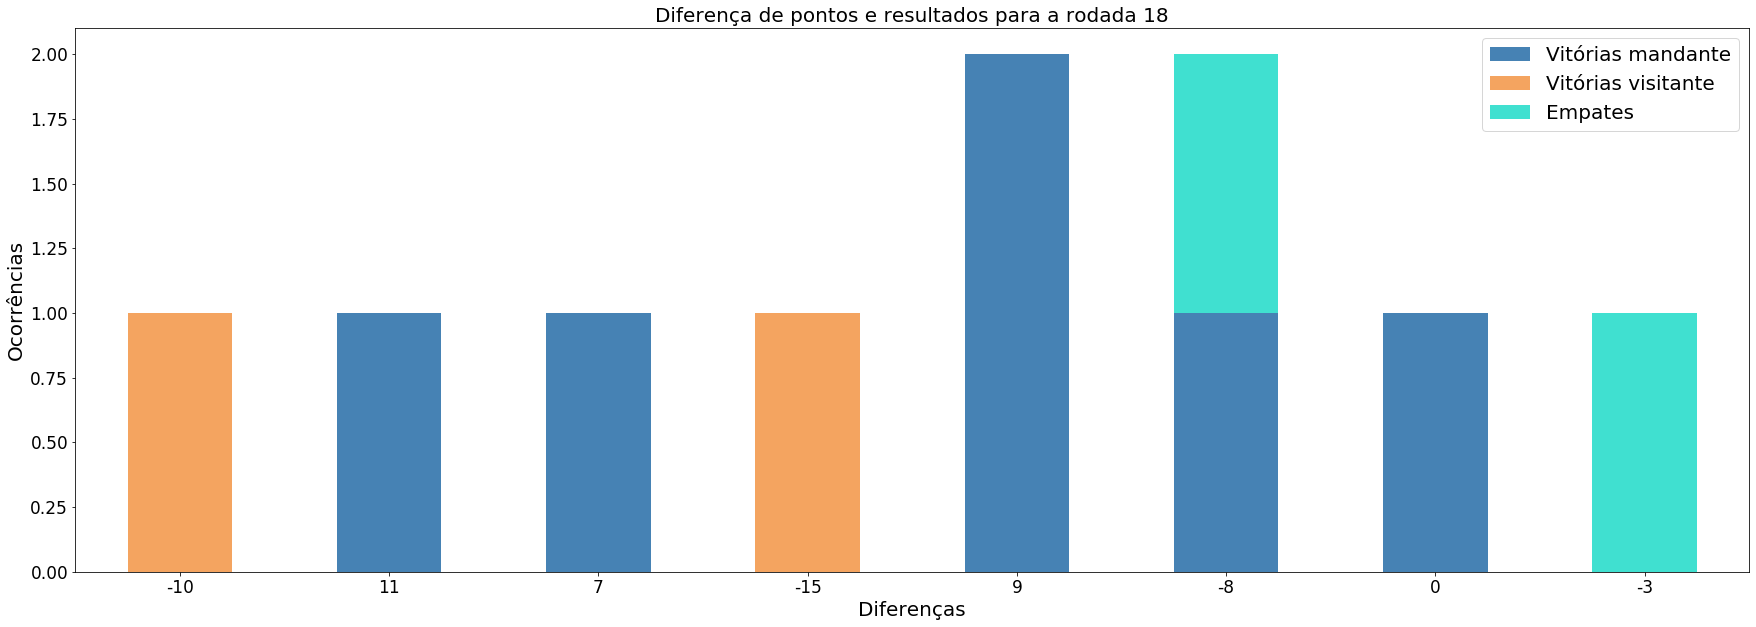

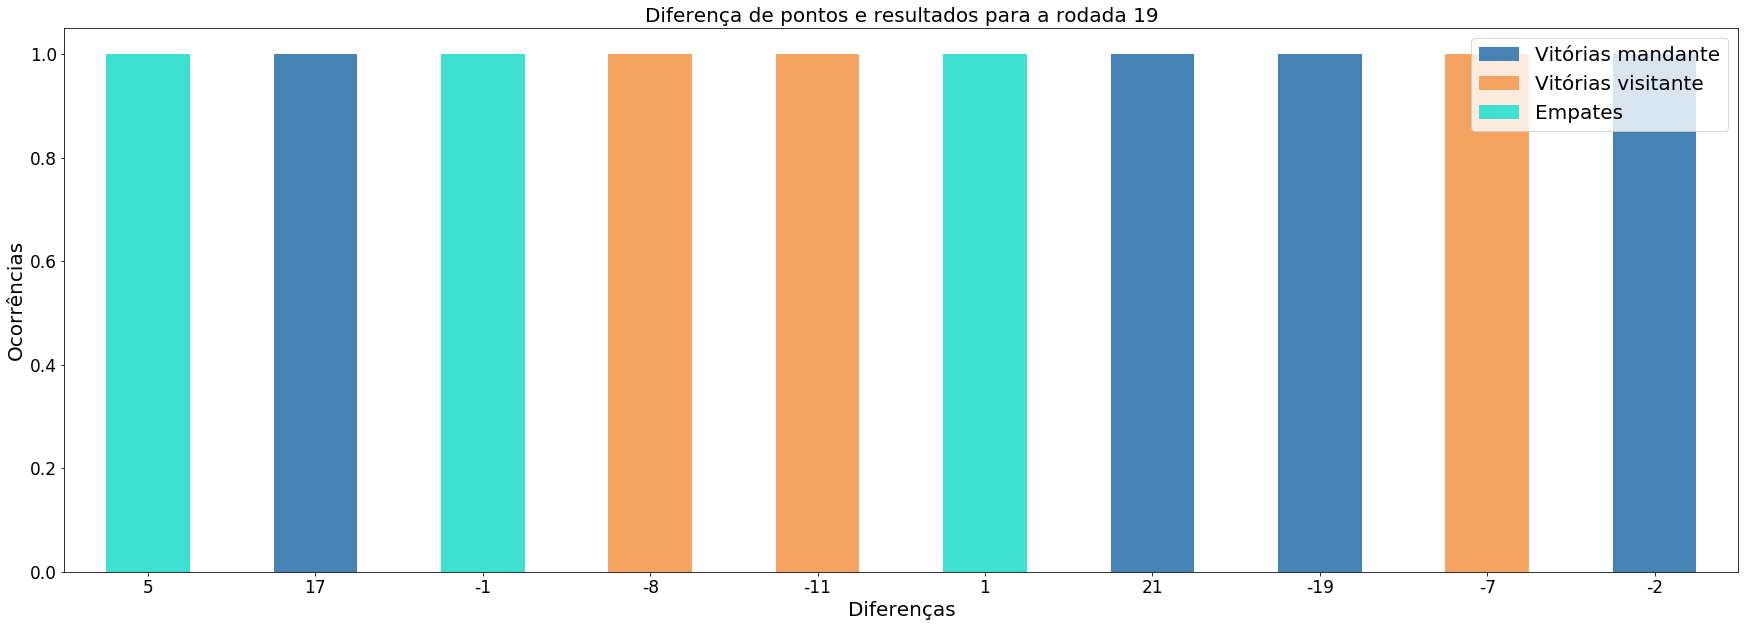

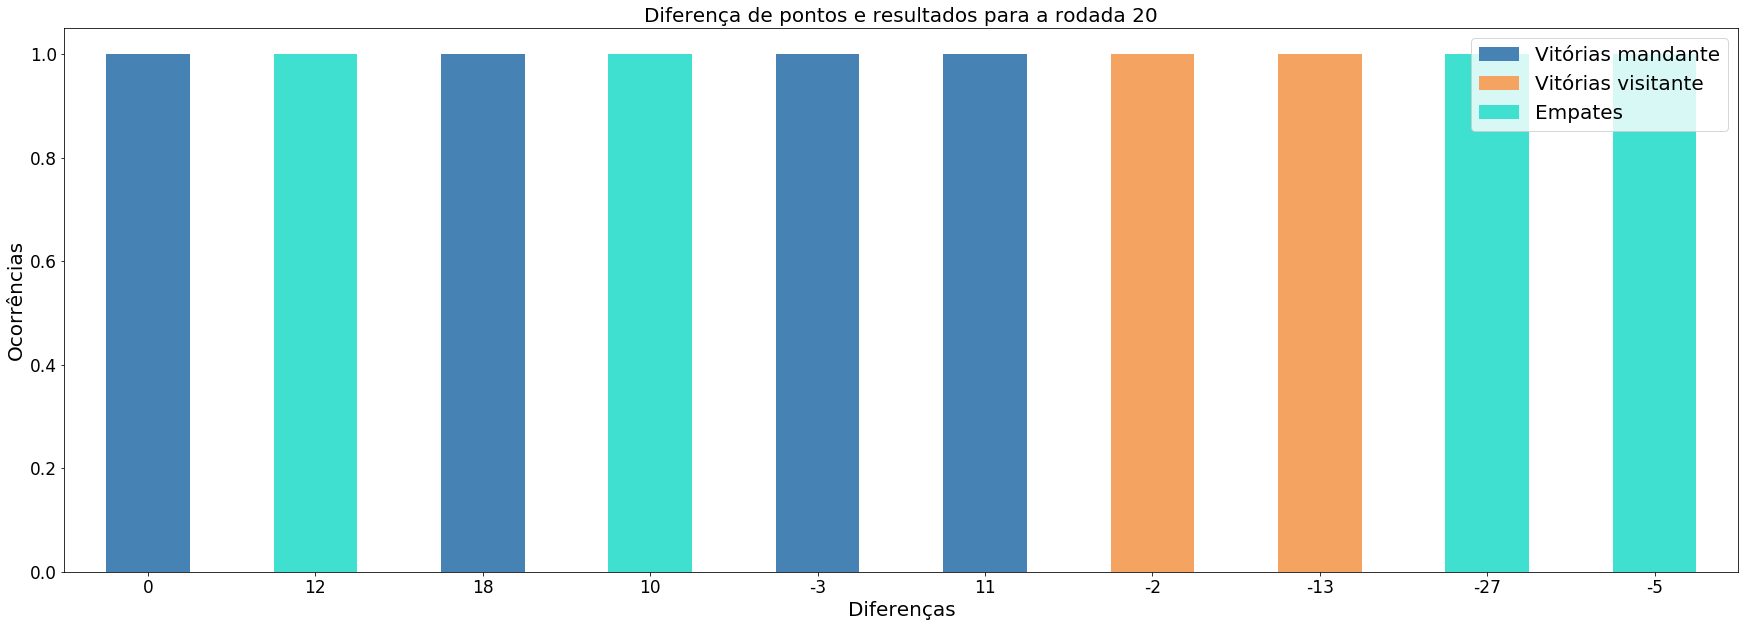

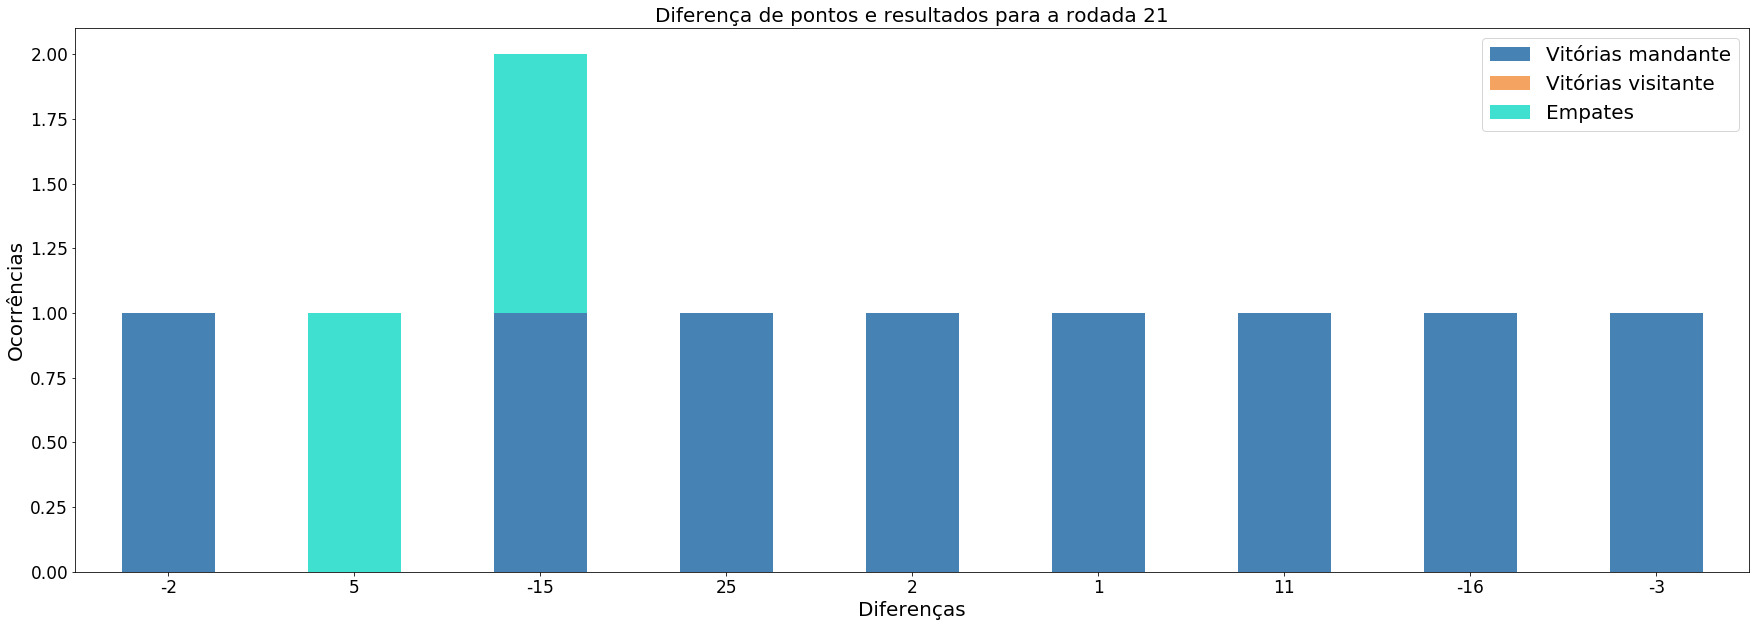

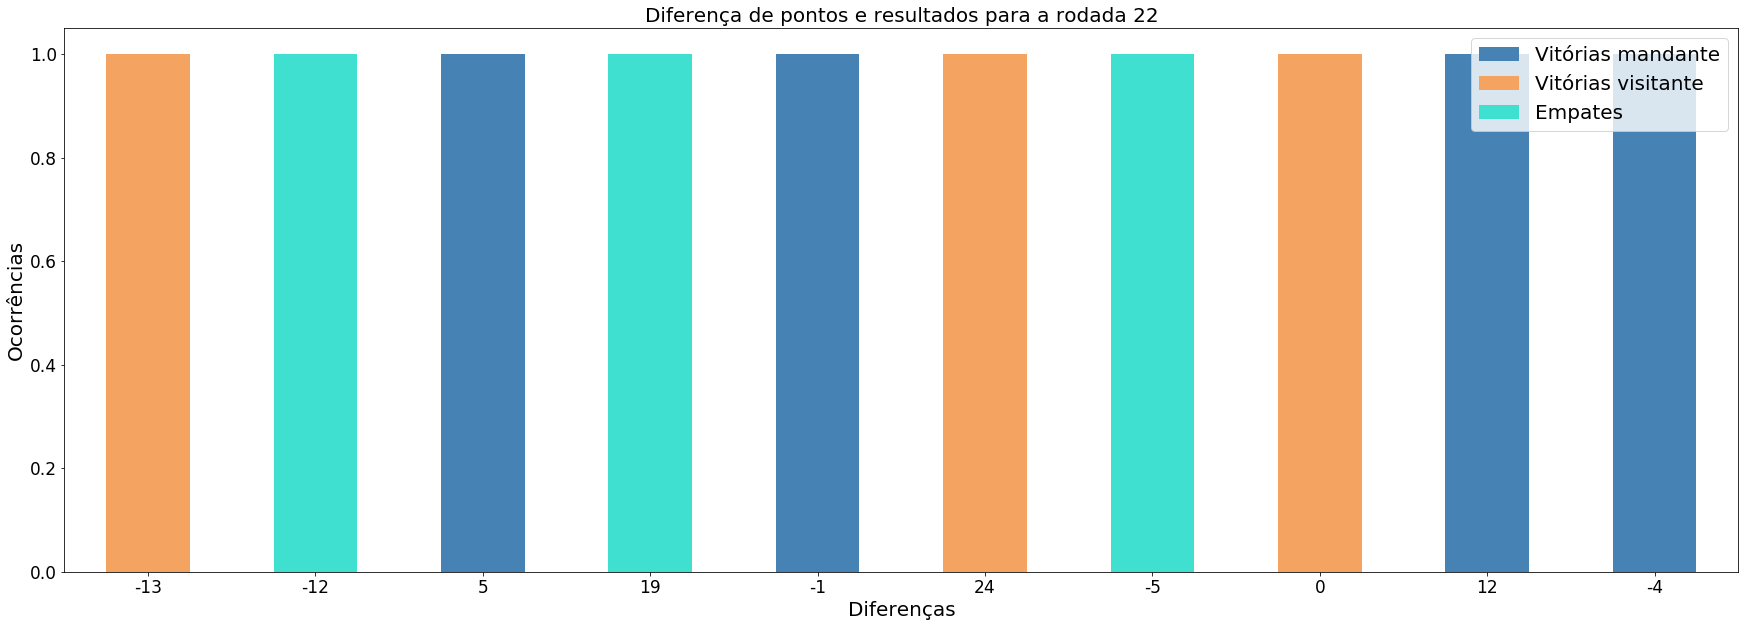

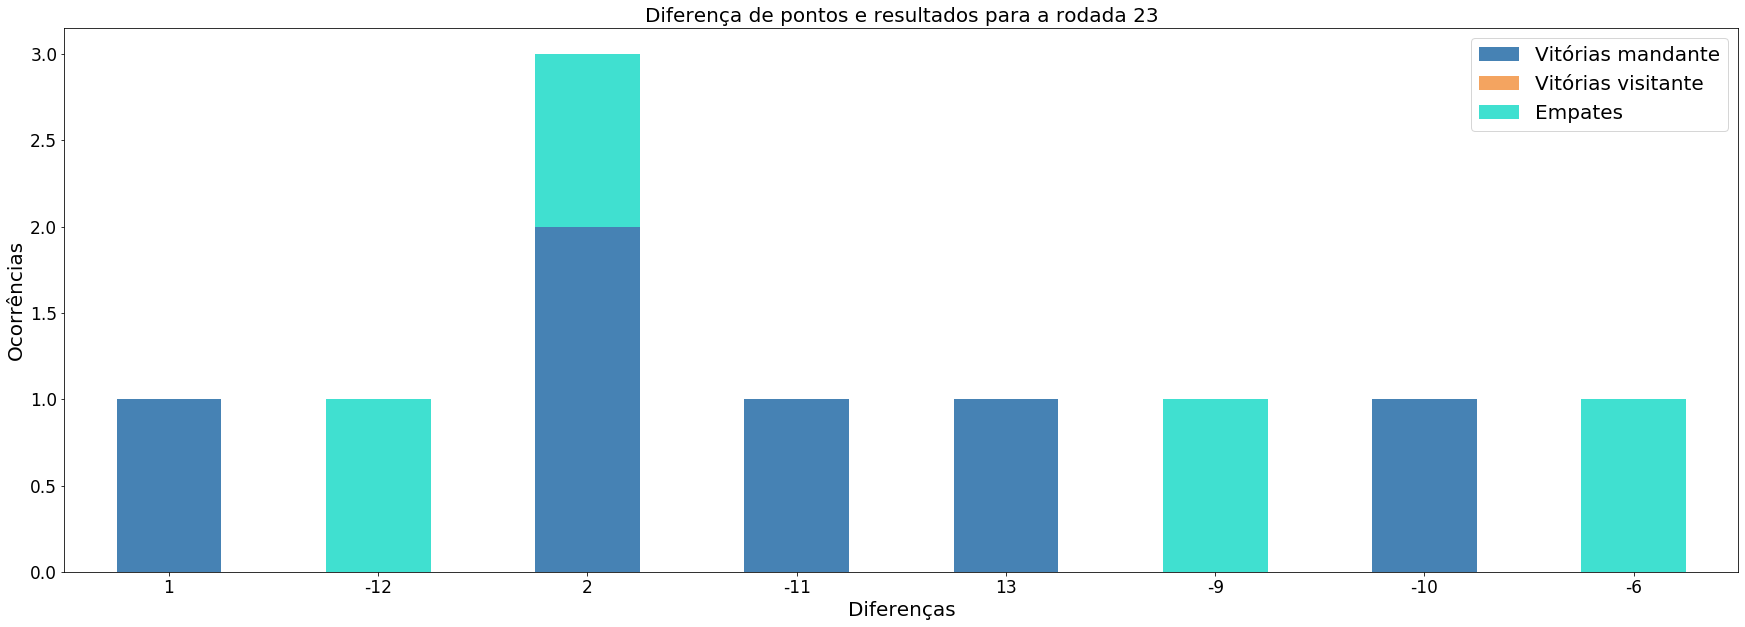

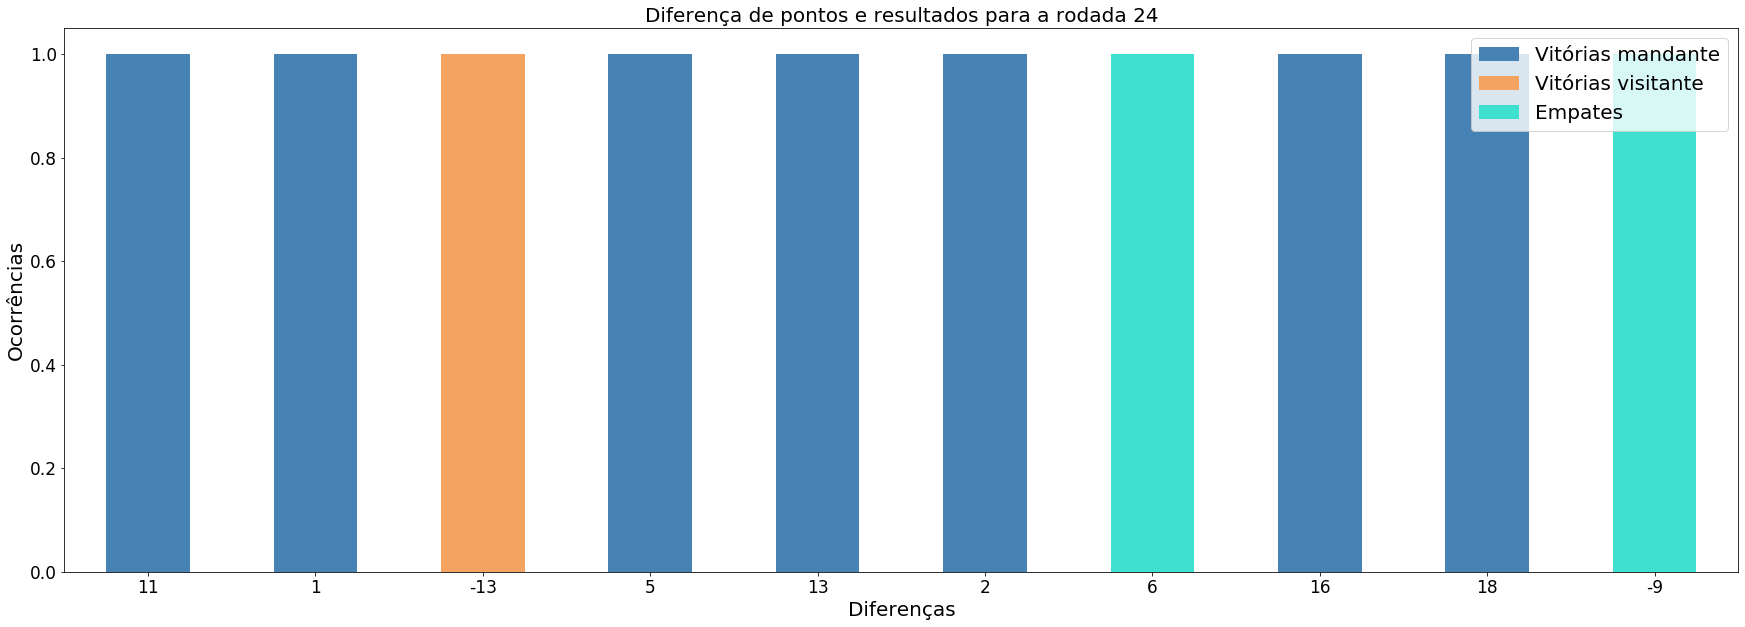

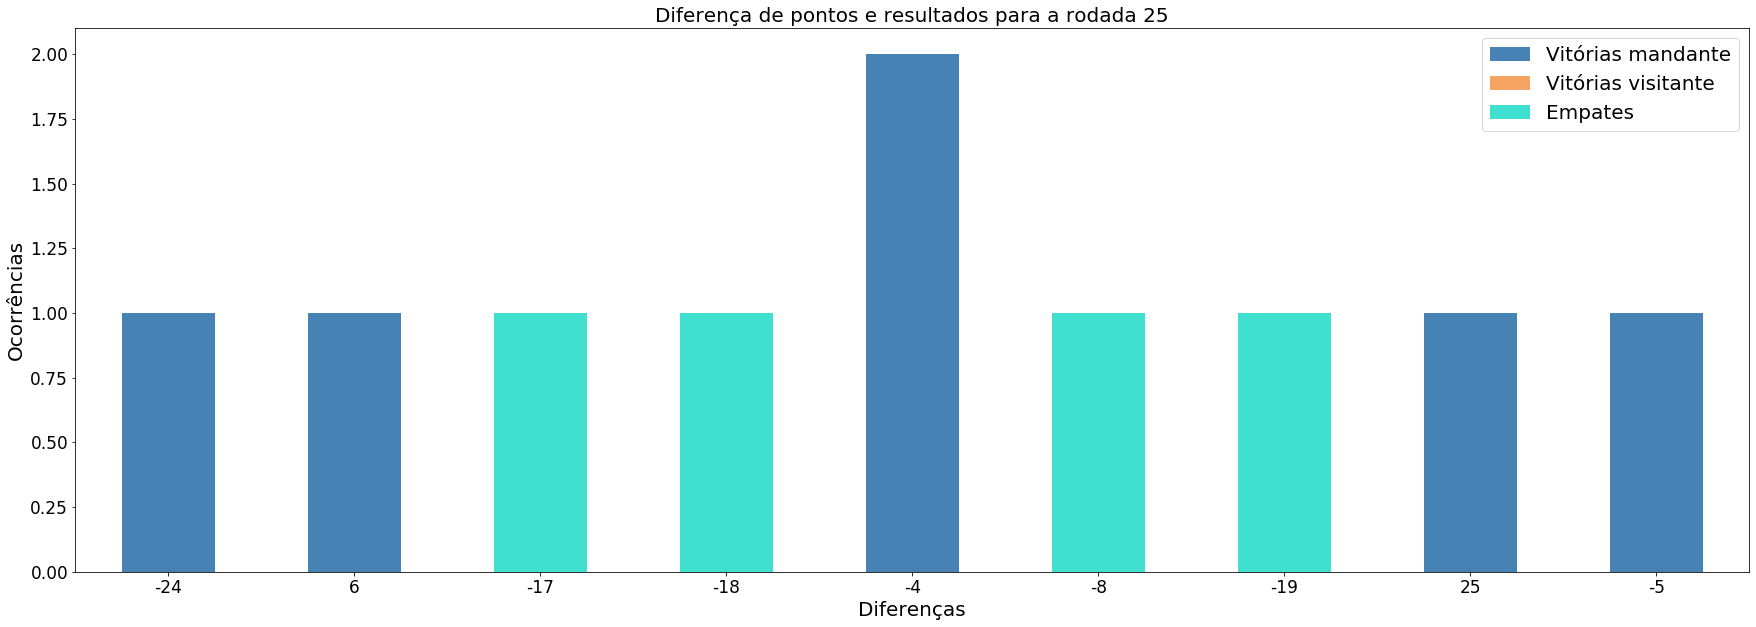

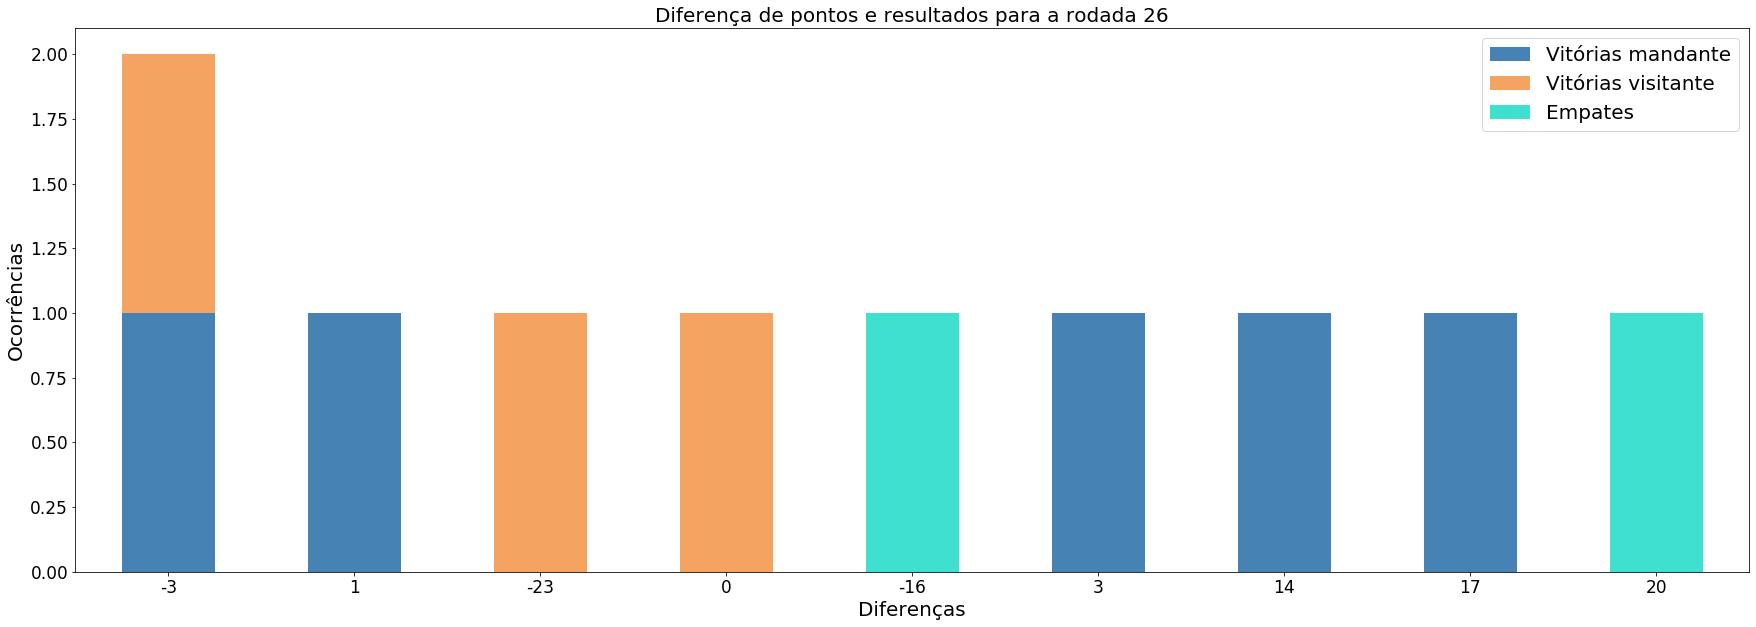

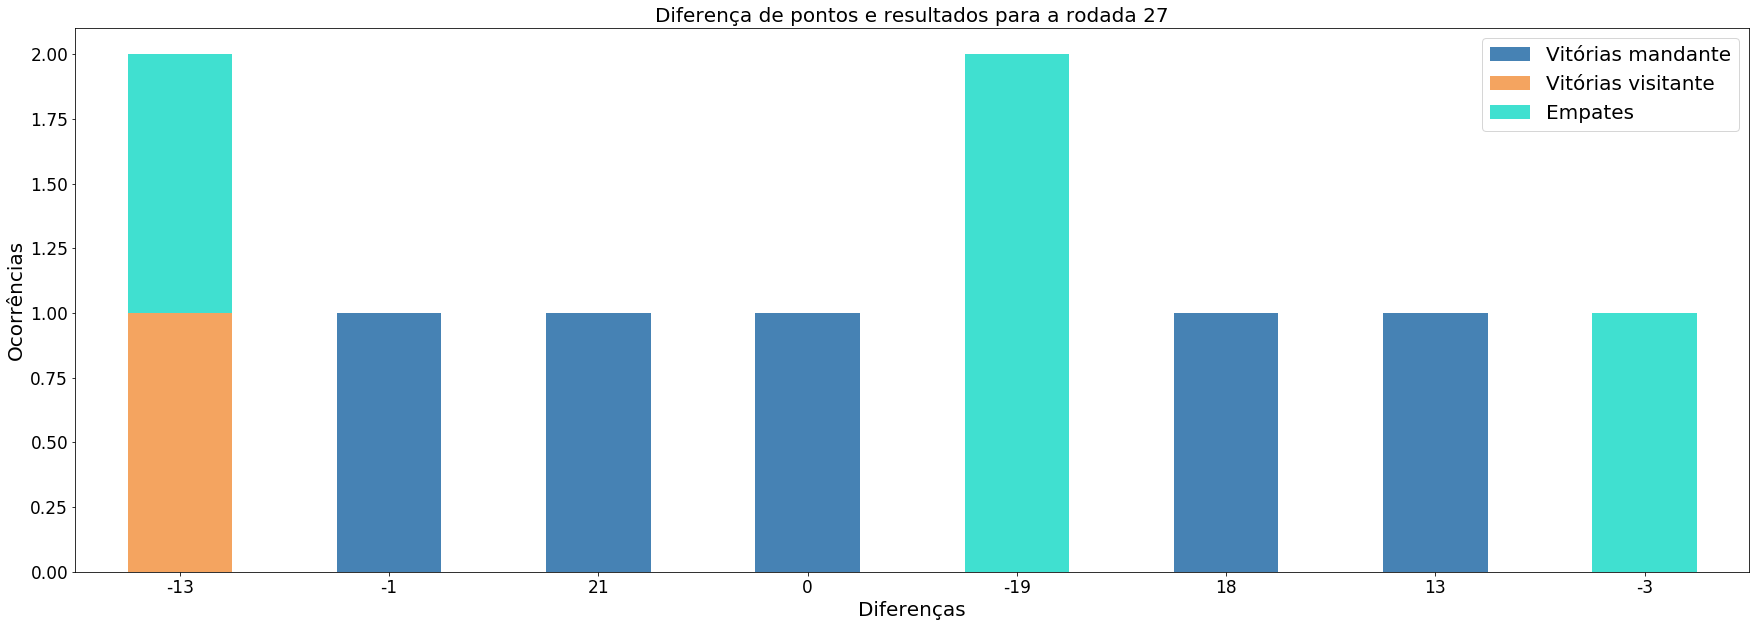

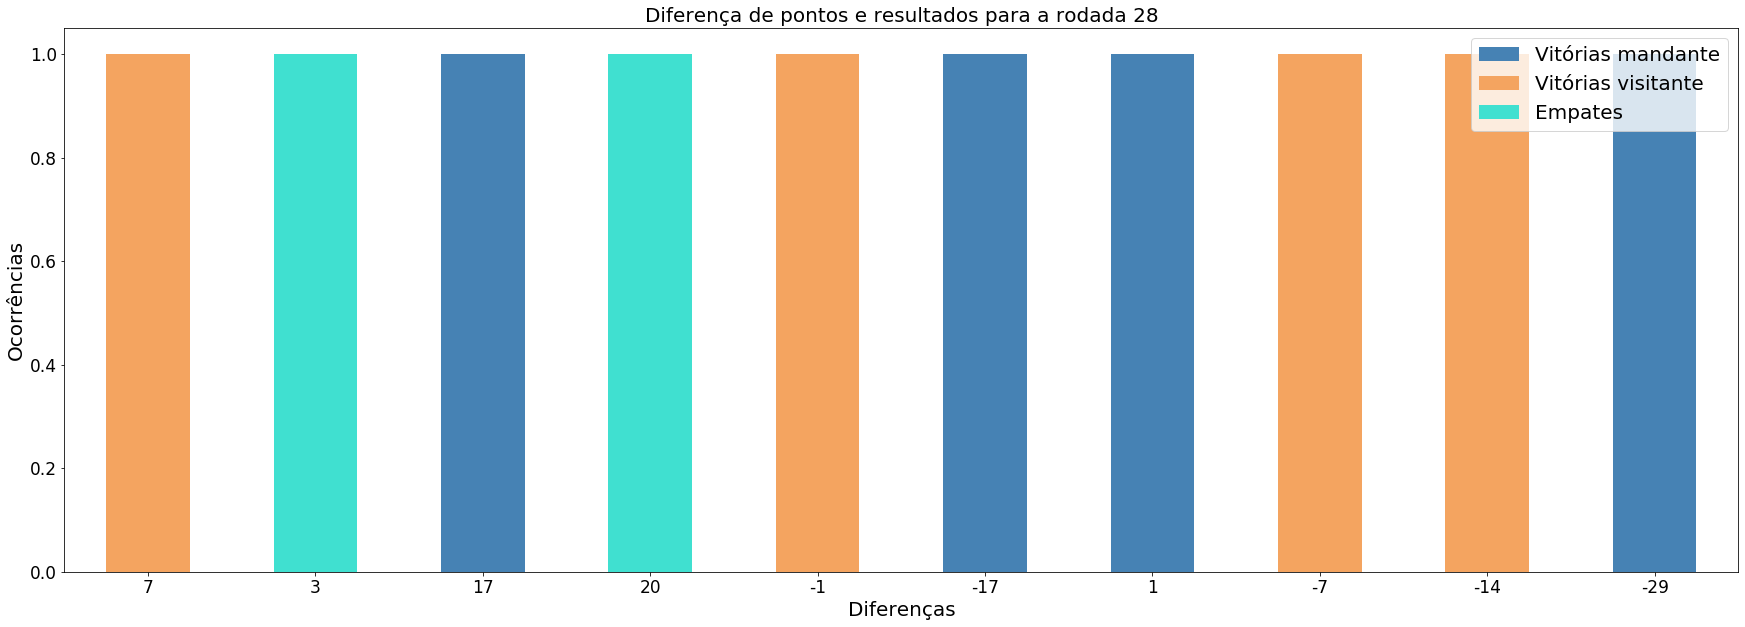

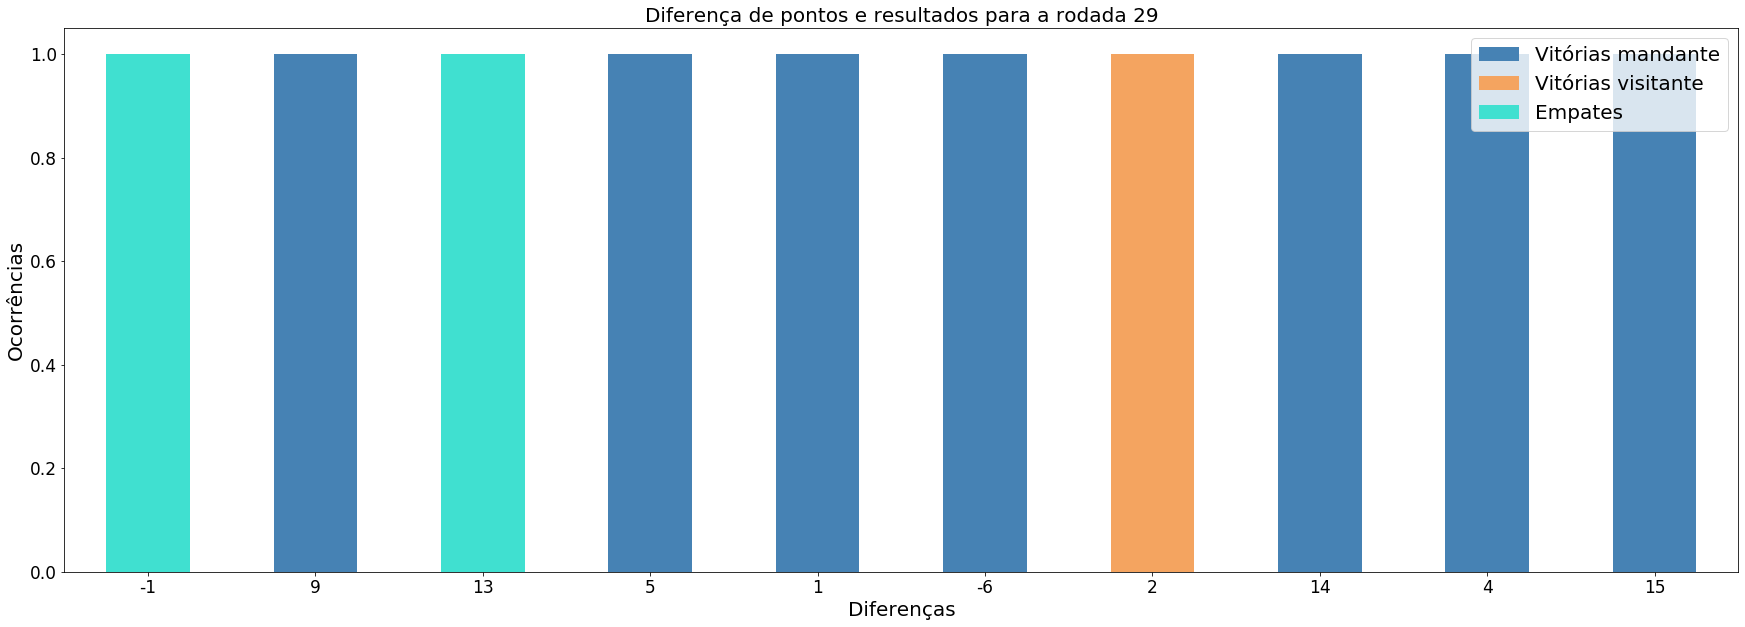

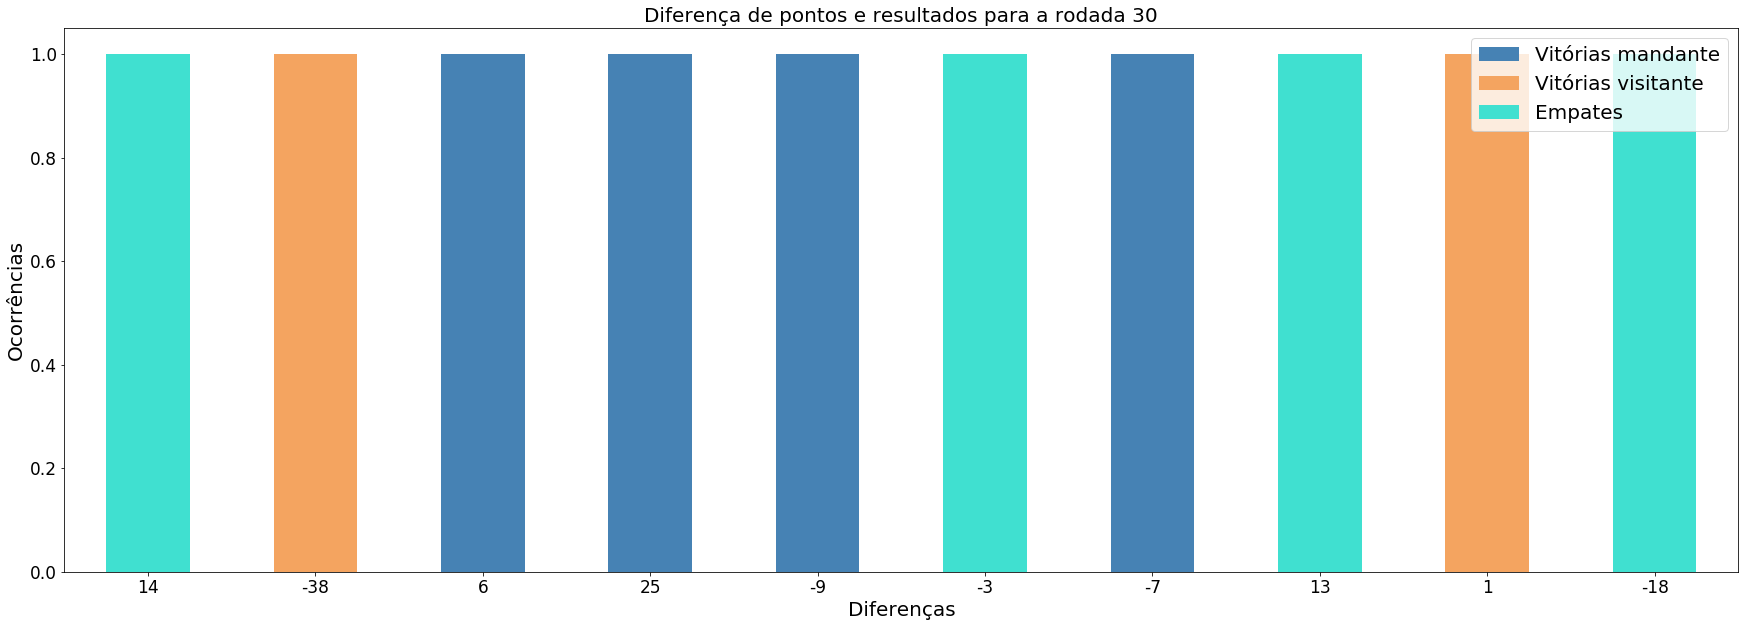

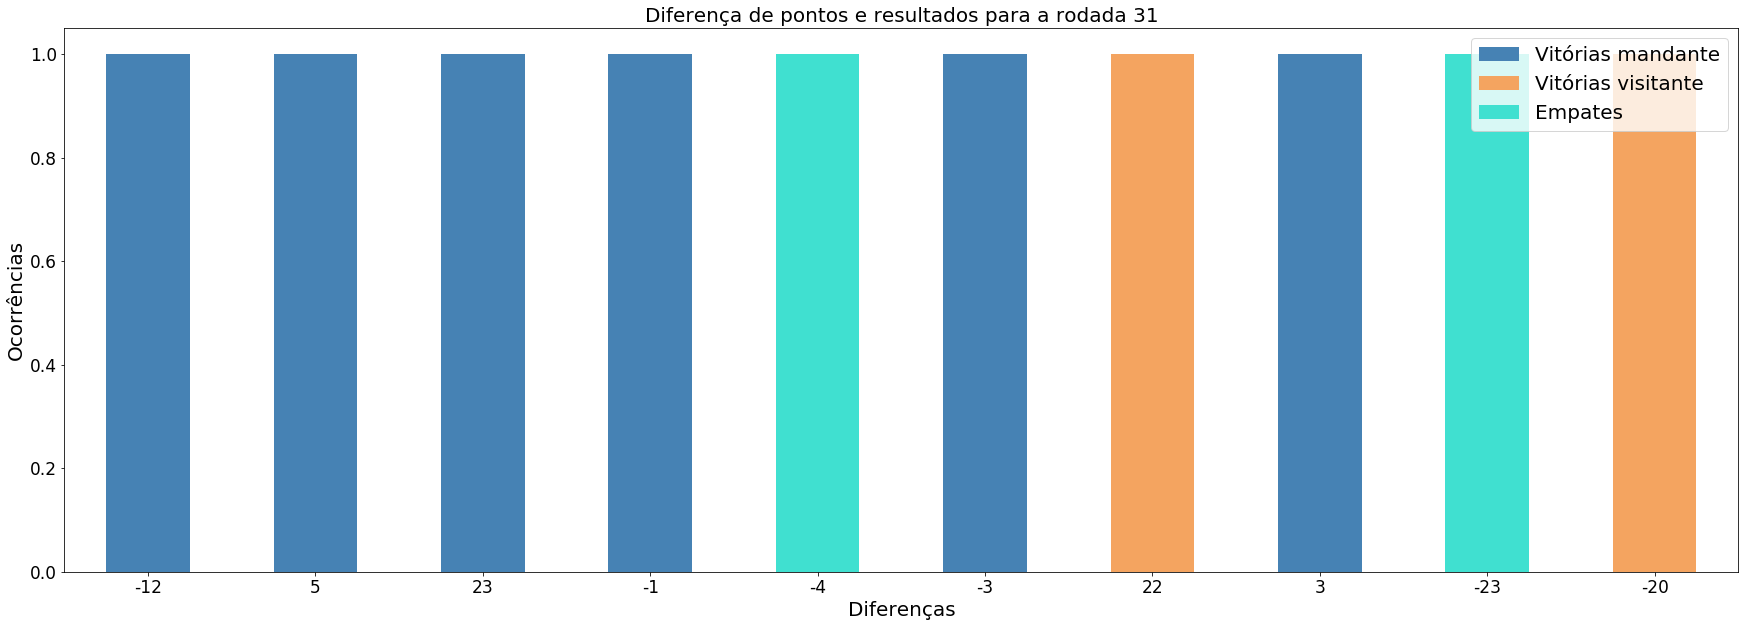

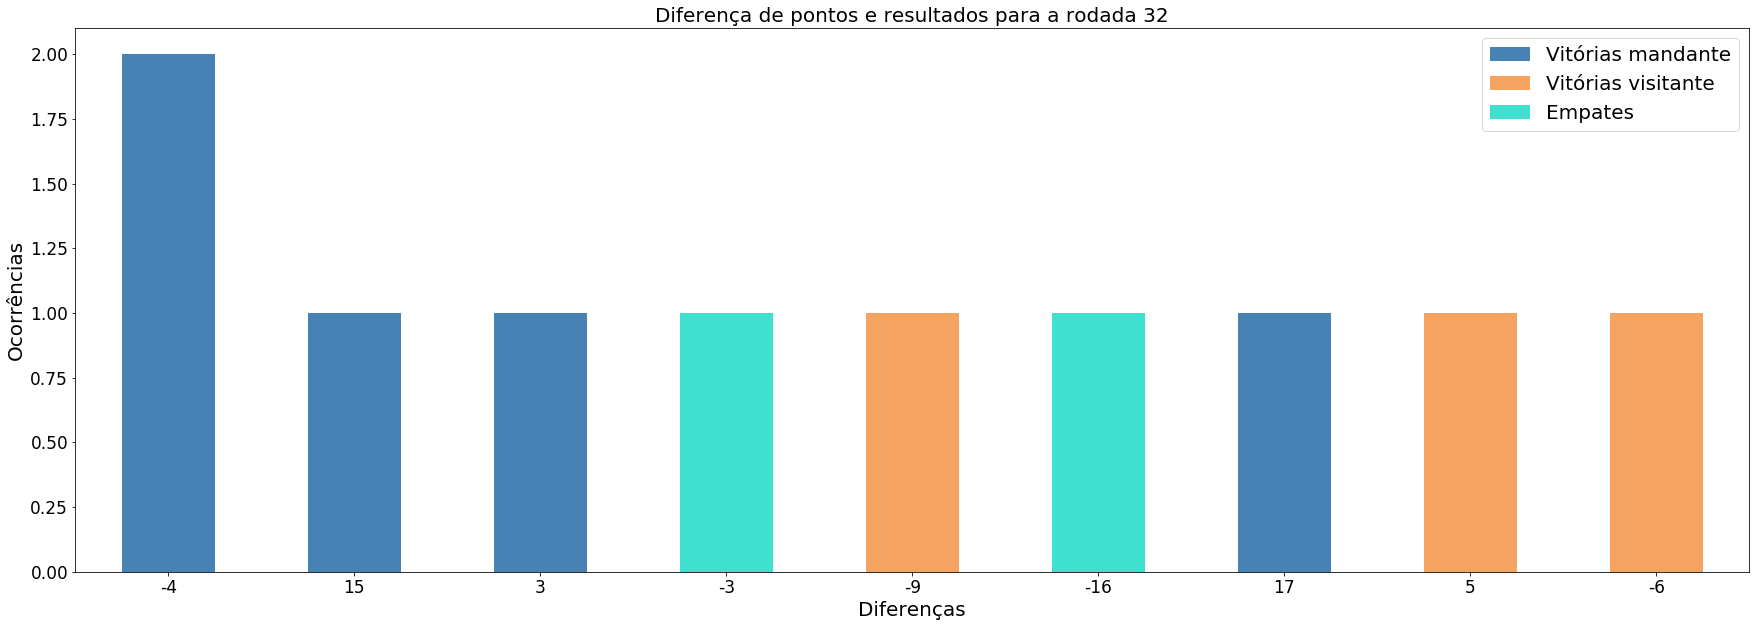

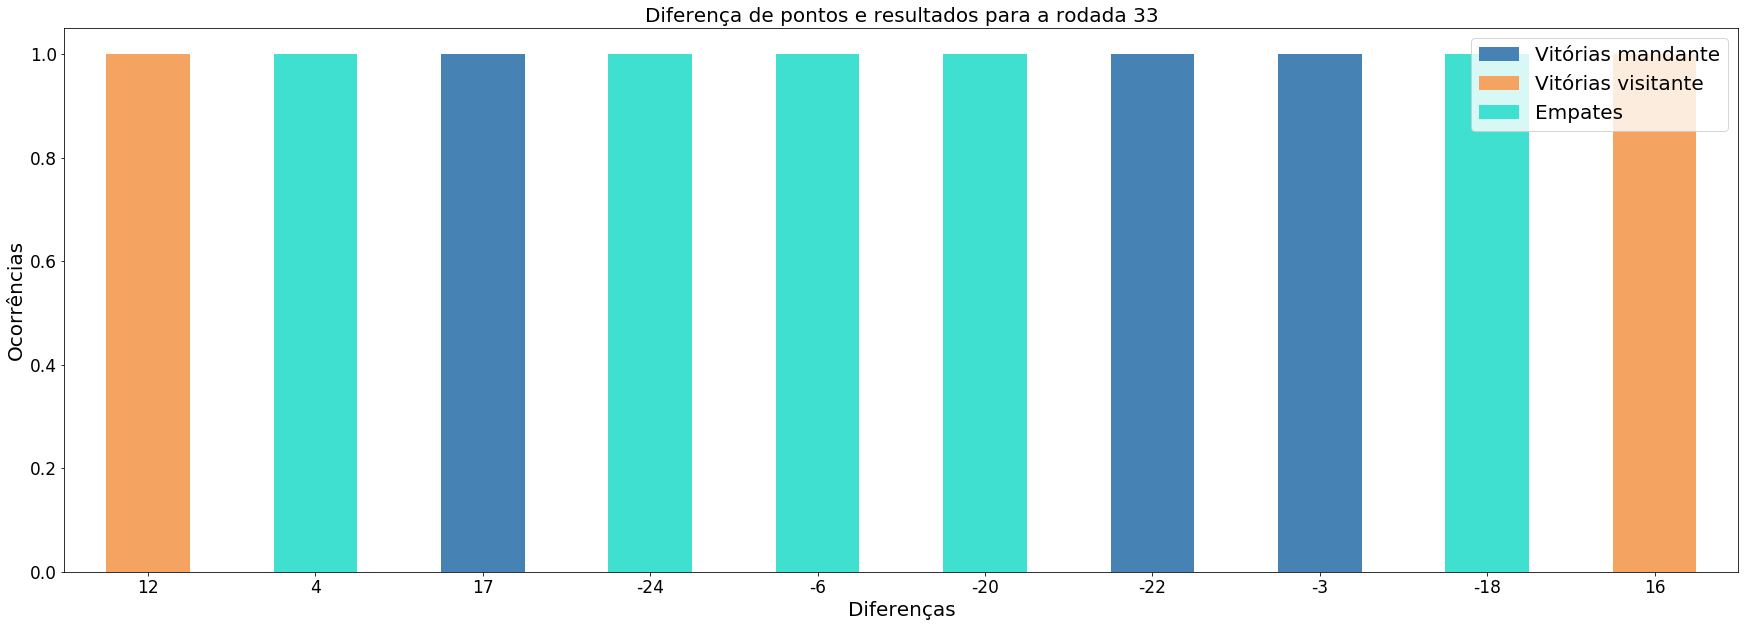

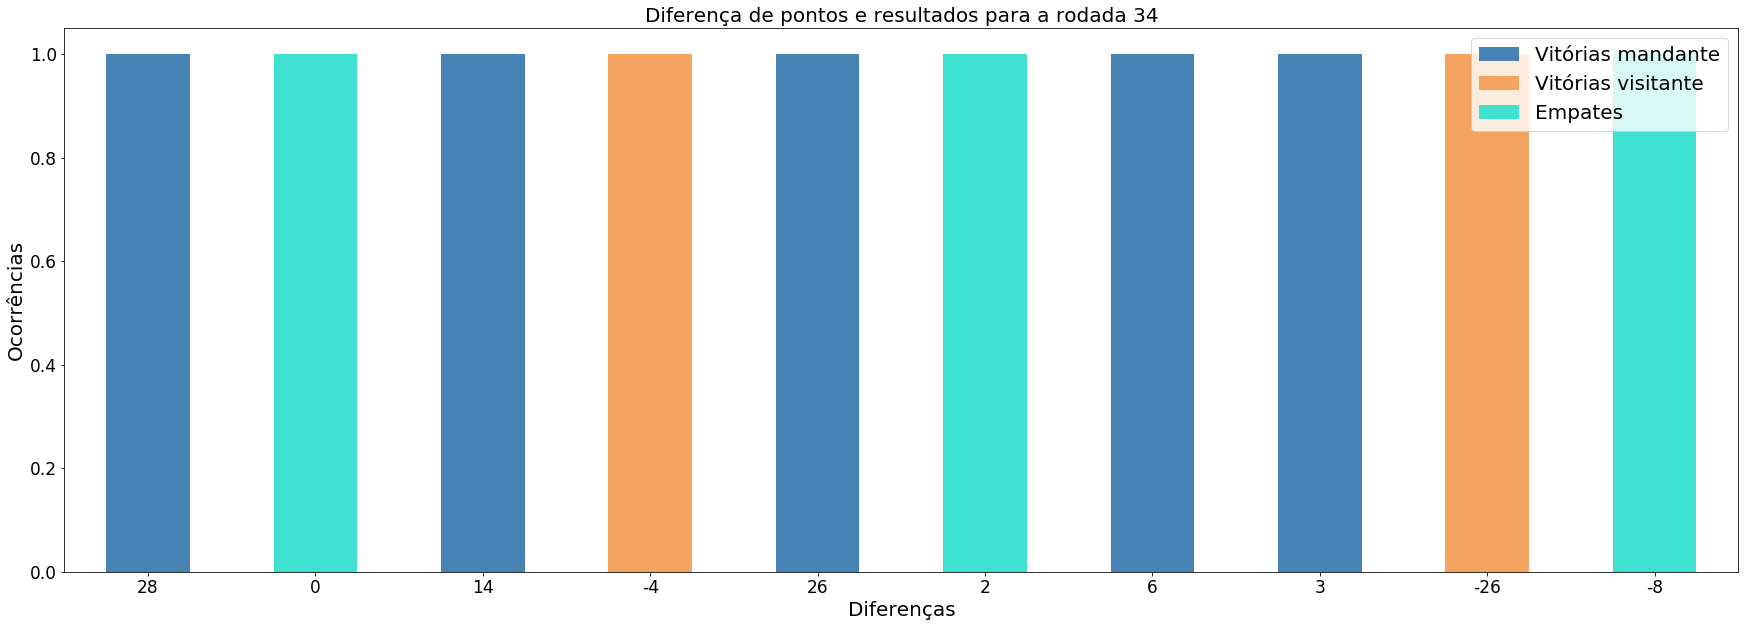

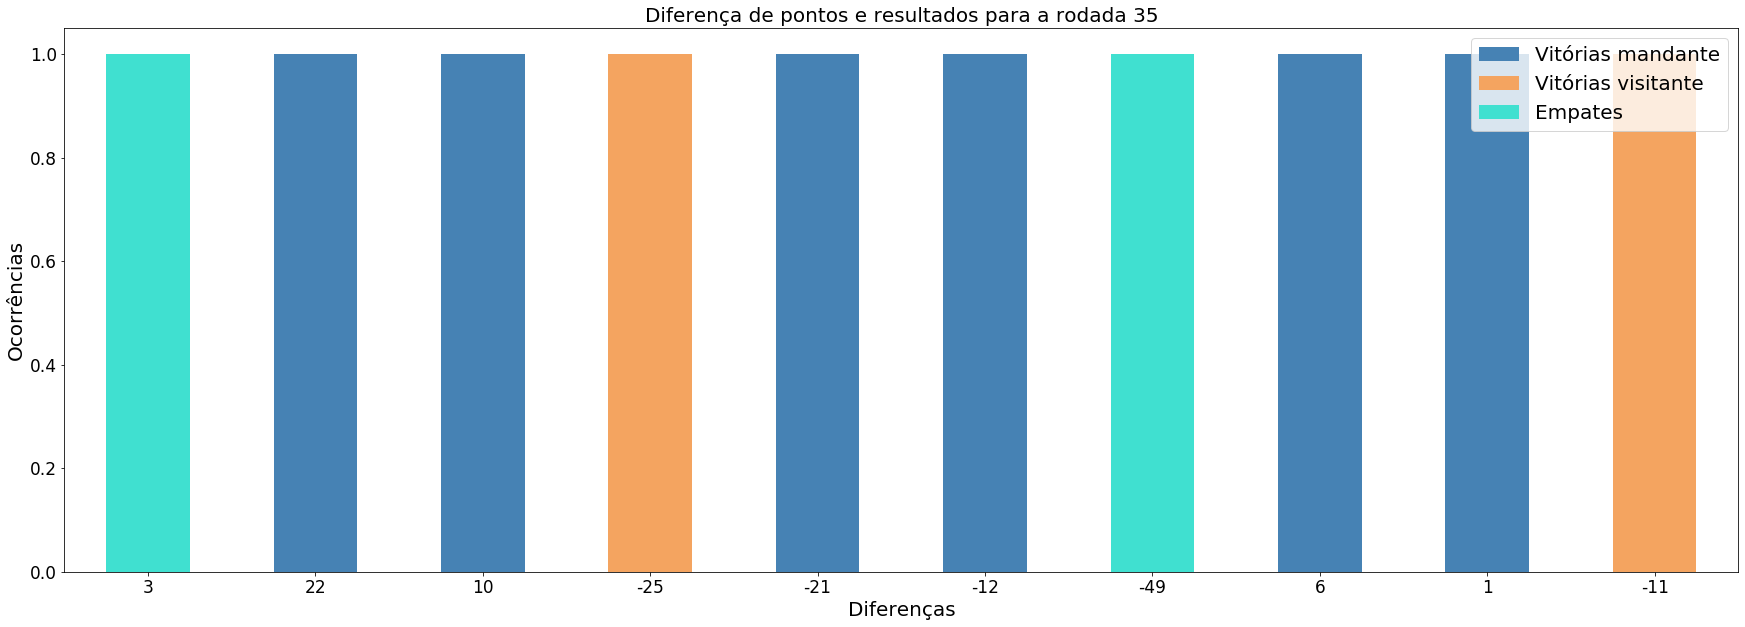

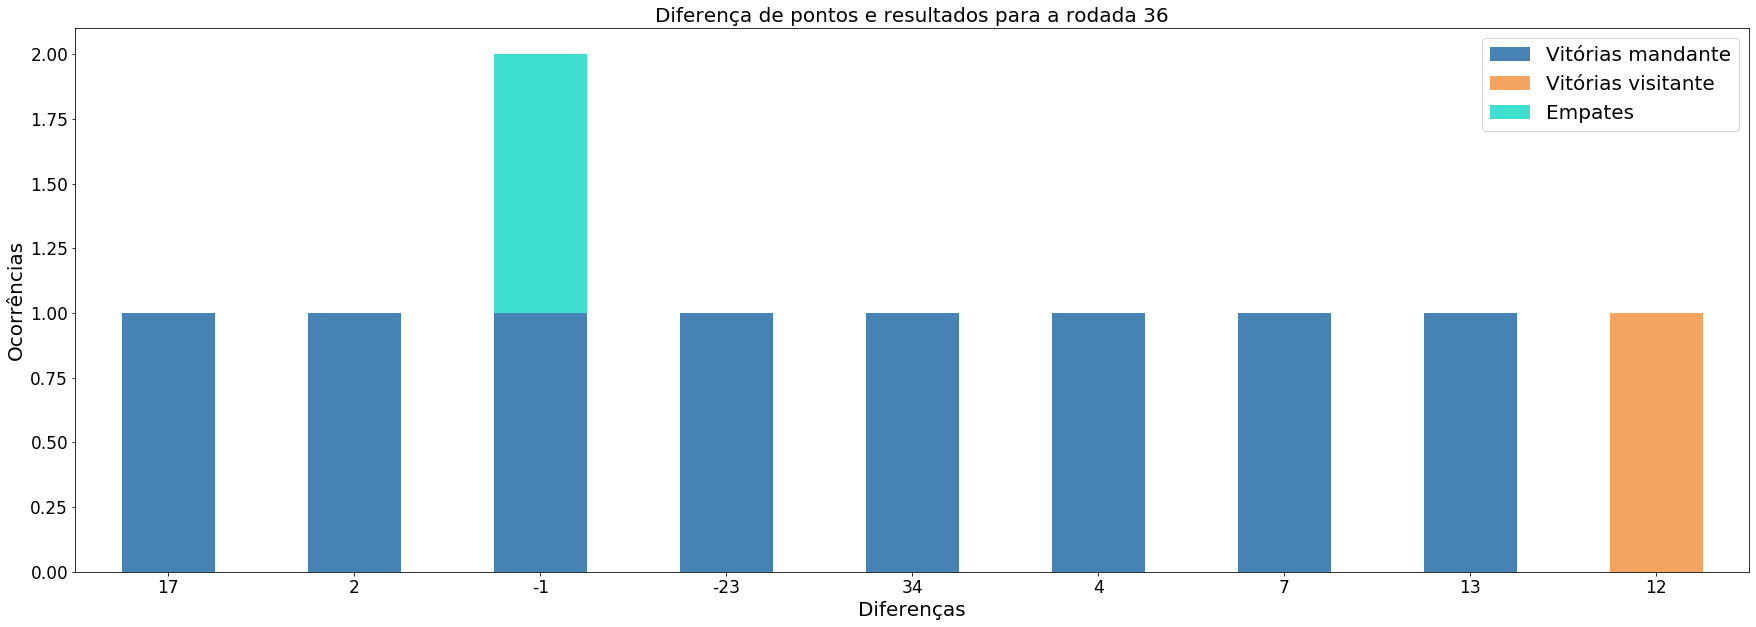

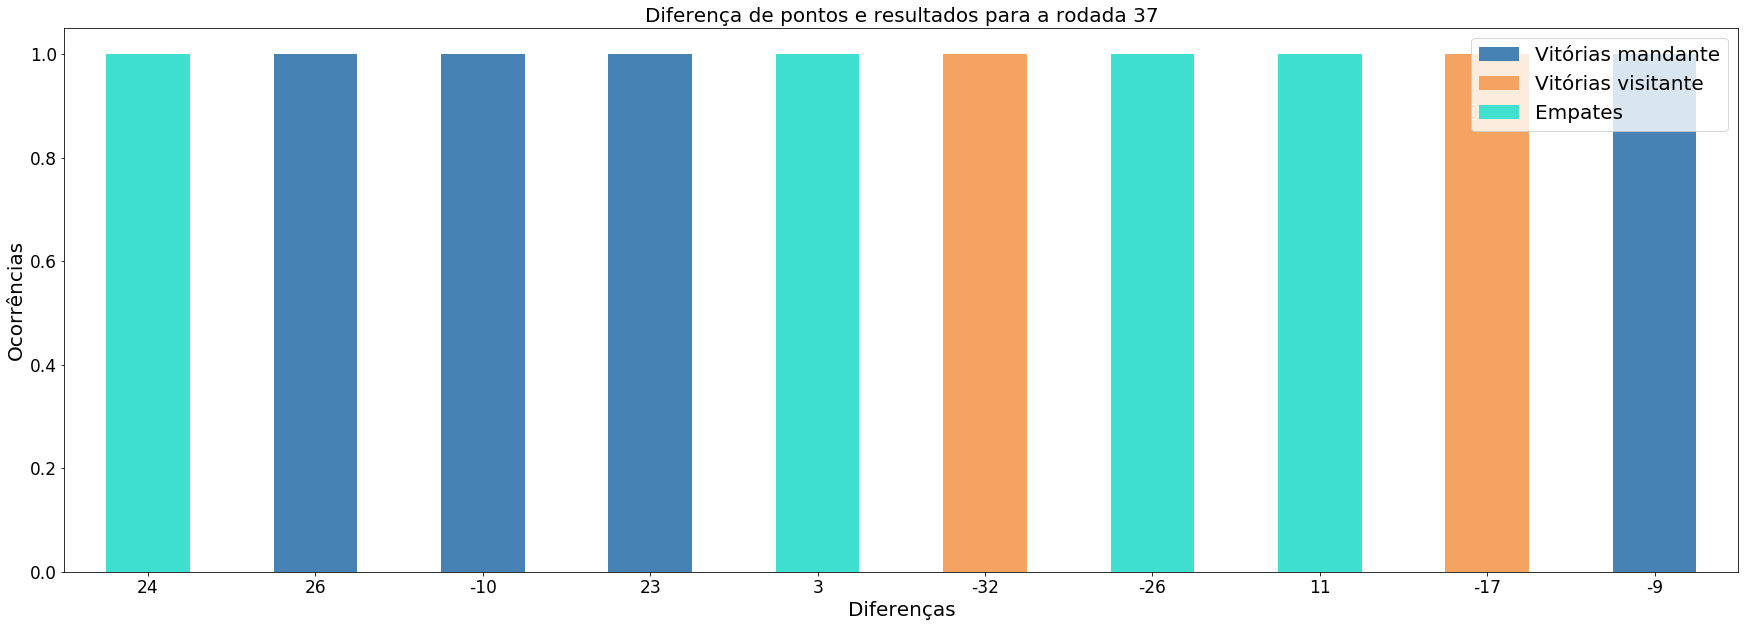

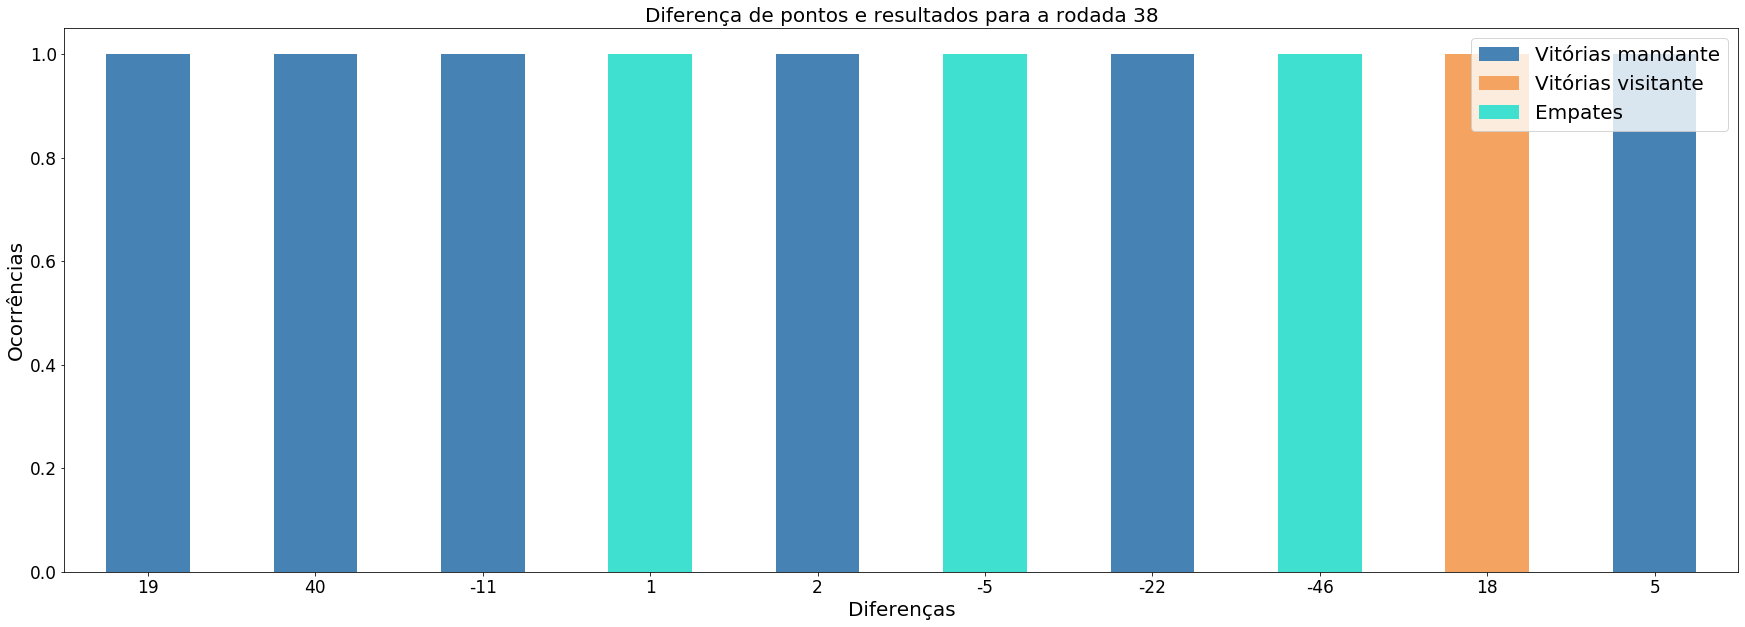

In [20]:
# Plotando todas as diferenças de pontos e resultados em todas as rodadads:

for i in range(1,39):
    plot_resultado = pd.DataFrame(diferenca_rodada[i], index=['Vitórias mandante', 'Vitórias visitante', 'Empates'])   
    plot_resultado.T.plot(kind='bar', stacked = True, figsize=[30,10], color = ['steelblue','sandybrown', 'turquoise'])
    plt.legend(loc=1,prop={'size':20})
    plt.title('Diferença de pontos e resultados para a rodada ' + str(i), size = 20)
    plt.xlabel('Diferenças', size =20)
    plt.ylabel('Ocorrências', size =20)
    plt.xticks(rotation=0)
    plt.tick_params(axis='both', which='major', labelsize=17)
    plt.tick_params(axis='both', which='minor', labelsize=17)

Conclui-se, então, que a maioria das vitórias de times visitantes advém dos times que estão nas primeiras colocações. Além disso, os melhores colocados raramente são derrotados quando são mandantes.

# Influência da torcida no resultado dos jogos

É necessário avaliar a lotação dos estádios, uma vez que o percentual de ingressos vendidos não nos revela o quão cheio o estádio estava. A informação sobre a capacidade máxima de cada estádio não está disponível nesse dataframe, então uma forma de nivelar esse número seria dividir pelo público máximo de cada equipe quando mandante.

In [21]:
# Encontrando lista com o nome dos times, sem o São Paulo:

times = []
for i in range(1,20):
    times.append(df['casa'][i])

# Criando a série:

serie = df[df['casa'] == 'São Paulo']['pp']/df[df['casa'] == 'São Paulo']['pp'].max()

# Adicionando todos os outros times:

for time in times:
    serie = serie.append(df[df['casa'] == time]['pp']/df[df['casa'] == time]['pp'].max())

# Ajustando o index:

serie.sort_index(ascending = True, inplace = True)

# Criando coluna 'lotação':

df['lotação']=serie

In [22]:
df.head(10)

,casa,gols_c,gols_v,visitante,pp,iv,iv%,renda_L,renda_B,resultado,lotação
0,São Paulo,1,0,Paraná,11327.0,15437.0,73,140284.04,338295.00,C,0.193214
1,Botafogo,1,1,Palmeiras,7020.0,7515.0,93,-200131.47,207880.00,E,0.253796
2,Athletico Paranaense,5,1,Chapecoense,8395.0,8395.0,100,-77837.78,130015.00,C,0.416708
3,Internacional,2,0,Bahia,18460.0,18460.0,100,524782.95,796275.00,C,0.455521
4,Corinthians,2,1,Fluminense,28777.0,28777.0,100,871251.02,1372018.06,C,0.671654
5,Vasco,2,1,Atlético Mineiro,6349.0,7606.0,84,-48726.86,176600.00,C,0.116950
6,América Mineiro,3,0,Sport,3230.0,3608.0,90,-56296.29,36293.00,C,0.313775
7,Santos,2,0,Ceará,12268.0,12268.0,100,139766.13,526550.00,C,0.508560
8,Vitória,2,2,Flamengo,12669.0,13981.0,91,133166.18,238994.00,E,0.583448
9,Cruzeiro,0,1,Grêmio,15252.0,15255.0,100,279460.67,418305.00,V,0.632155


In [23]:
# Retorna dataframe com a lotação dos estádios, tal que:

# Lotação >= 75%: Público ótimo;
# 50% <= Lotação < 75%: Público bom;
# 25% <= Lotação < 50%: Público regular;
# 0% <= Lotação < 25%: Público ruim.

def acha_estatistica_publico(df):
    return pd.DataFrame(data = [len(df[df.lotação >= 0.75]),
                                 len(df[(df['lotação']<0.75) & (df['lotação']>=0.5)]),
                                 len(df[(df['lotação']<0.5) & (df['lotação']>=0.25)]),
                                 len(df[(df['lotação']<0.25) & (df['lotação']>=0)])],
                        index = ['Público ótimo', 'Público bom', 'Público regular', 'Público ruim'],
                        columns =['Campeonato de 2018']).T

In [24]:
# Pritando o dataframe:

est_pub = acha_estatistica_publico(df)
est_pub

,Público ótimo,Público bom,Público regular,Público ruim
Campeonato de 2018,89,99,126,66


In [25]:
# Retorna dataframe com o número de vitórias, derrotas e empates para cada classificação da lotação dos estádios:

def acha_estatistica_resultados_publico(df):
    return pd.DataFrame(data = {'Lotação':
                                ['Público ótimo', 'Público bom', 'Público regular', 'Público ruim'],
                                'Vitórias dos mandantes':
                                [len(df[(df['lotação'] >= 0.75) & (df['resultado']=='C')]),
                                len(df[(df['lotação']<0.75) & (df['lotação']>=0.5) & (df['resultado']=='C')]),
                                len(df[(df['lotação']<0.75) & (df['lotação']>=0.5) & (df['resultado']=='C')]),
                                len(df[(df['lotação']<0.25) & (df['lotação']>=0) & (df['resultado']=='C')])],
                                'Vitórias dos visitantes':
                                [len(df[(df['lotação'] >= 0.75) & (df['resultado']=='V')]),
                                 len(df[(df['lotação']<0.75) & (df['lotação']>=0.5) & (df['resultado']=='V')]),
                                 len(df[(df['lotação']<0.5) & (df['lotação']>=0.25) & (df['resultado']=='V')]),
                                 len(df[(df['lotação']<0.25) & (df['lotação']>=0) & (df['resultado']=='V')])],
                                'Empates':
                                [len(df[(df['lotação'] >= 0.75) & (df['resultado']=='E')]),
                                 len(df[(df['lotação']<0.75) & (df['lotação']>=0.5) & (df['resultado']=='E')]),
                                 len(df[(df['lotação']<0.5) & (df['lotação']>=0.25) & (df['resultado']=='E')]),
                                 len(df[(df['lotação']<0.25) & (df['lotação']>=0) & (df['resultado']=='E')])],
                                 '% Vitória dos mandantes': 
                                 [100*len(df[(df['lotação'] >= 0.75) & (df['resultado']=='C')])/89,
                                  100*len(df[(df['lotação']<0.75) & (df['lotação']>=0.5) & (df['resultado']=='C')])/99,
                                  100*len(df[(df['lotação']<0.75) & (df['lotação']>=0.5) & (df['resultado']=='C')])/126,
                                  100*len(df[(df['lotação']<0.25) & (df['lotação']>=0) & (df['resultado']=='C')])/66],
                                  '% Vitória dos visitantes':
                                 [100*len(df[(df['lotação'] >= 0.75) & (df['resultado']=='V')])/89,
                                  100*len(df[(df['lotação']<0.75) & (df['lotação']>=0.5) & (df['resultado']=='V')])/99,
                                  100*len(df[(df['lotação']<0.5) & (df['lotação']>=0.25) & (df['resultado']=='V')])/126,
                                  100*len(df[(df['lotação']<0.25) & (df['lotação']>=0) & (df['resultado']=='V')])/66],
                                  '% Empates':
                                 [100*len(df[(df['lotação'] >= 0.75) & (df['resultado']=='E')])/89,
                                  100*len(df[(df['lotação']<0.75) & (df['lotação']>=0.5) & (df['resultado']=='E')])/99,
                                  100*len(df[(df['lotação']<0.5) & (df['lotação']>=0.25) & (df['resultado']=='E')])/126,
                                  100*len(df[(df['lotação']<0.25) & (df['lotação']>=0) & (df['resultado']=='E')])/66]}                               
                                )

In [26]:
# Pritando o dataframe:

est_res_pub = acha_estatistica_resultados_publico(df)
est_res_pub

,Lotação,Vitórias dos mandantes,Vitórias dos visitantes,Empates,% Vitória dos mandantes,% Vitória dos visitantes,% Empates
0,Público ótimo,48,14,27,53.932584,15.730337,30.337079
1,Público bom,55,16,28,55.555556,16.161616,28.282828
2,Público regular,55,25,33,43.650794,19.841270,26.190476
3,Público ruim,31,13,22,46.969697,19.696970,33.333333


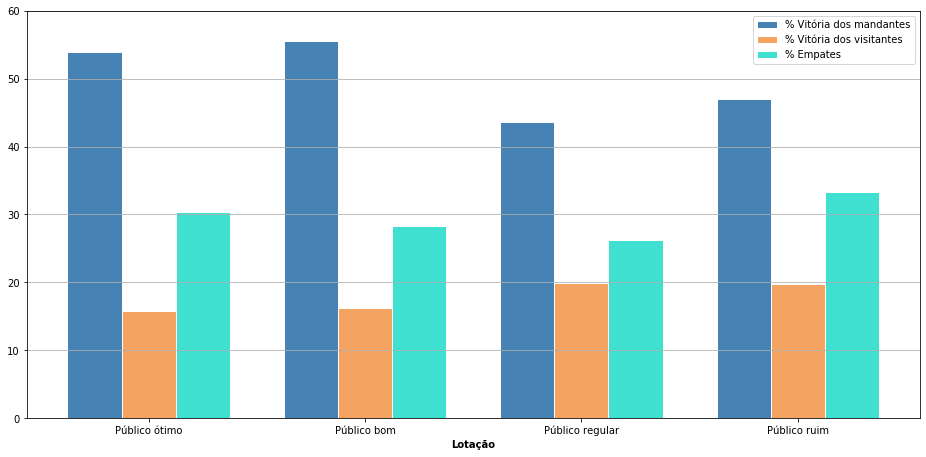

In [27]:
# Criando um plot em barras para os percentuais acima:

# Largura das barras e tamanho da figura:

larg = 0.25
plt.figure(figsize =(16,7.5))

# Tamanho das barras:

bars1 = []
bars2 = []
bars3 = []
for i in range (0,4):
    bars1.append(est_res_pub['% Vitória dos mandantes'][i])
    bars2.append(est_res_pub['% Vitória dos visitantes'][i])
    bars3.append(est_res_pub['% Empates'][i])
bars1 = [round(x,2) for x in bars1]
bars2 = [round(x,2) for x in bars2]
bars3 = [round(x,2) for x in bars3]

# Setar a posição das barras:

r1 = np.arange(len(bars1))
r2 = [x + larg for x in r1]
r3 = [x + larg for x in r2]
 
# Criar o plot:

plt.bar(r1, bars1, color='steelblue', width=larg, edgecolor='white', label='% Vitória dos mandantes')
plt.bar(r2, bars2, color='sandybrown', width=larg, edgecolor='white', label='% Vitória dos visitantes')
plt.bar(r3, bars3, color='turquoise', width=larg, edgecolor='white', label='% Empates')
 
# Adicionando os nomes no eixo x:

plt.xlabel('Lotação', fontweight='bold')
plt.xticks([r + larg for r in range(len(bars1))], ['Público ótimo', 'Público bom', 'Público regular', 'Público ruim'])

# Limitado o eixo y em 60:

plt.ylim([0,60])
 
# Criar a legenda, gride e mostrar a figura:

plt.grid(axis='y') 
plt.legend()
plt.show()

Percebe-se clara correlação entre o público e o desempenho dos times mandantes.


Existem outros fatores que poderiam ser objeto de análise, como a classificação no ano anterior e o histórico do confronto entre dois times. Como o dataset possui apenas um ano, isso se torna inviável.

# Adicionando mais algumas estatísticas ao dataframe

In [28]:
# Calcular os gols feitos por rodada:

def acha_gols_feitos(df):
    times=acha_times(df)
    for i in range(len(df)):
        gols_feitos_casa = df.iloc[i]['gols_c']
        gols_feitos_visitante = df.iloc[i]['gols_v']
        times[df.iloc[i].casa].append(gols_feitos_casa)
        times[df.iloc[i].visitante].append(gols_feitos_visitante)
    # Criar um dataframe dos gols feitos:
    
    Gols_Feitos = pd.DataFrame(data=times, index = [i for i in range(1,39)]).T
    Gols_Feitos[0] = 0
    for i in range(2,39):
        Gols_Feitos[i] = Gols_Feitos[i] + Gols_Feitos[i-1]
    return Gols_Feitos

# Calcular os gols sofridos por rodada:

def acha_gols_sofridos(df):
    times = acha_times(df)
    for i in range(len(df)):
        gols_sofridos_casa = df.iloc[i]['gols_v']
        gols_sofridos_visitante = df.iloc[i]['gols_c']
        times[df.iloc[i].casa].append(gols_sofridos_casa)
        times[df.iloc[i].visitante].append(gols_sofridos_visitante)  
   # Criar um dataframe dos gols sofridos:

    Gols_Sofridos = pd.DataFrame(data=times, index = [i for i in range(1,39)]).T
    Gols_Sofridos[0] = 0
    for i in range(2,39):
        Gols_Sofridos[i] = Gols_Sofridos[i] + Gols_Sofridos[i-1]
    return Gols_Sofridos

# Coloca os gols sofridos e feitos no data frame:

def gols_para_dataframe(df):
    gols_sofridos = acha_gols_sofridos(df)
    gols_feitos = acha_gols_feitos(df)
    j = 0
    gols_feitos_casa = []
    gols_feitos_visitante = []
    gols_sofridos_casa = []
    gols_sofridos_visitante = []
    for i in range(380):
        mandante = df.iloc[i].casa
        visitante = df.iloc[i].visitante
        gols_feitos_casa.append(gols_feitos.loc[mandante][j])
        gols_feitos_visitante.append(gols_feitos.loc[visitante][j])
        gols_sofridos_casa.append(gols_sofridos.loc[mandante][j])
        gols_sofridos_visitante.append(gols_sofridos.loc[visitante][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1     
    df['gols_feitos_casa'] = gols_feitos_casa
    df['gols_feitos_visitante'] = gols_feitos_visitante
    df['gols_sofridos_casa'] = gols_sofridos_casa
    df['gols_sofridos_visitante'] = gols_sofridos_visitante
    return df

gols_para_dataframe(df).head()

,casa,gols_c,gols_v,visitante,pp,iv,iv%,renda_L,renda_B,resultado,lotação,gols_feitos_casa,gols_feitos_visitante,gols_sofridos_casa,gols_sofridos_visitante
0,São Paulo,1,0,Paraná,11327.0,15437.0,73,140284.04,338295.00,C,0.193214,0,0,0,0
1,Botafogo,1,1,Palmeiras,7020.0,7515.0,93,-200131.47,207880.00,E,0.253796,0,0,0,0
2,Athletico Paranaense,5,1,Chapecoense,8395.0,8395.0,100,-77837.78,130015.00,C,0.416708,0,0,0,0
3,Internacional,2,0,Bahia,18460.0,18460.0,100,524782.95,796275.00,C,0.455521,0,0,0,0
4,Corinthians,2,1,Fluminense,28777.0,28777.0,100,871251.02,1372018.06,C,0.671654,0,0,0,0


In [29]:
acha_gols_feitos(df)

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,0
América Mineiro,3,3,5,6,8,9,10,10,13,14,...,26,26,27,27,27,29,29,30,30,0
Athletico Paranaense,5,5,5,6,7,7,7,9,10,10,...,41,43,44,46,47,49,50,52,54,0
Atlético Mineiro,1,3,4,6,8,9,9,11,14,17,...,47,48,48,49,50,51,53,55,56,0
Bahia,0,1,1,1,3,3,6,6,6,6,...,31,32,33,35,37,37,39,39,39,0
Botafogo,1,2,4,4,6,6,7,9,11,11,...,29,30,31,33,34,35,36,38,38,0
Ceará,0,0,0,1,3,4,4,4,4,4,...,25,27,27,28,29,29,30,32,32,0
Chapecoense,1,2,2,3,6,6,7,9,12,12,...,29,30,30,31,31,31,33,33,34,0
Corinthians,2,6,6,7,8,9,10,11,11,12,...,30,32,32,33,33,34,34,34,34,0
Cruzeiro,0,0,0,1,3,3,4,5,6,7,...,25,28,30,30,31,31,34,34,34,0
Flamengo,2,4,7,9,11,12,13,15,16,18,...,48,49,51,52,53,54,56,58,59,0


In [30]:
# Coloca os pontos acumulados no dataframe:

def pontos_acumulados_df(df):
    resultado = acha_resultado(df)
    pontos_acumulados = acha_pontos_acumulados(resultado)
    pontos_casa = []
    pontos_visitante = []
    j = 0
    for i in range(380):
        casa = df.iloc[i].casa
        visitante = df.iloc[i].visitante
        pontos_casa.append(pontos_acumulados.loc[casa][j])
        pontos_visitante.append(pontos_acumulados.loc[visitante][j])
        if ((i + 1)% 10) == 0:
            j = j + 1
    df['pontos_casa'] = pontos_casa
    df['pontos_visitante'] = pontos_visitante
    return df
pontos_acumulados_df(df).head()

,casa,gols_c,gols_v,visitante,pp,iv,iv%,renda_L,renda_B,resultado,lotação,gols_feitos_casa,gols_feitos_visitante,gols_sofridos_casa,gols_sofridos_visitante,pontos_casa,pontos_visitante
0,São Paulo,1,0,Paraná,11327.0,15437.0,73,140284.04,338295.00,C,0.193214,0,0,0,0,0,0
1,Botafogo,1,1,Palmeiras,7020.0,7515.0,93,-200131.47,207880.00,E,0.253796,0,0,0,0,0,0
2,Athletico Paranaense,5,1,Chapecoense,8395.0,8395.0,100,-77837.78,130015.00,C,0.416708,0,0,0,0,0,0
3,Internacional,2,0,Bahia,18460.0,18460.0,100,524782.95,796275.00,C,0.455521,0,0,0,0,0,0
4,Corinthians,2,1,Fluminense,28777.0,28777.0,100,871251.02,1372018.06,C,0.671654,0,0,0,0,0,0


In [31]:
# Função para calcular em que forma o time está, isto é, se vem de sequência de derrotas ou vitórias nos últimos n jogos:

def acha_forma(df,num):
    forma = acha_resultado(df)
    forma_final = forma.copy()
    for i in range(num,39):
        forma_final[i] = ''
        j = 0
        while j < num:
            forma_final[i] += forma[i-j]
            j += 1           
    return forma_final

#Adiciona a forma do time ao dataframe:

def add_forma(df,num):
    forma = acha_forma(df,num) 
    j = num
    c = ['M' for i in range(num * 10)]                # Não há como saber a forma para num*10 jogos,
    v = ['M' for i in range(num * 10)]                # então será adicionado a letra M nesse caso 
    for i in range((num*10),380):
        mandante = df.iloc[i].casa
        visitante = df.iloc[i].visitante       
        passado = forma.loc[mandante][j]               # Acha os últimos n resultados
        c.append(passado[num-1])                       # 0 é o jogo mais recente
        passado = forma.loc[visitante][j]              
        v.append(passado[num-1])                           
        if ((i + 1)% 10) == 0:
            j = j + 1
    df['MJ' + str(num)] = c              
    df['VJ' + str(num)] = v  
    return df

#Encontra o número de pontos da forma do time:

def acha_pontos_forma(string):
    sum = 0
    for letra in string:
        sum += acha_pontos(letra)
    return sum

In [32]:
# Adicionando ao dataset:

for num in range(1,6):
    add_forma(df,num)

In [33]:
# Retorna o número da rodada do jogo:

def acha_rodada(playing_stat):
    j = 1
    rodada = []
    for i in range(380):
        rodada.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    df['rodada'] = rodada
    return df
acha_rodada(df).head()

,casa,gols_c,gols_v,visitante,pp,iv,iv%,renda_L,renda_B,resultado,...,VJ1,MJ2,VJ2,MJ3,VJ3,MJ4,VJ4,MJ5,VJ5,rodada
0,São Paulo,1,0,Paraná,11327.0,15437.0,73,140284.04,338295.00,C,...,M,M,M,M,M,M,M,M,M,1
1,Botafogo,1,1,Palmeiras,7020.0,7515.0,93,-200131.47,207880.00,E,...,M,M,M,M,M,M,M,M,M,1
2,Athletico Paranaense,5,1,Chapecoense,8395.0,8395.0,100,-77837.78,130015.00,C,...,M,M,M,M,M,M,M,M,M,1
3,Internacional,2,0,Bahia,18460.0,18460.0,100,524782.95,796275.00,C,...,M,M,M,M,M,M,M,M,M,1
4,Corinthians,2,1,Fluminense,28777.0,28777.0,100,871251.02,1372018.06,C,...,M,M,M,M,M,M,M,M,M,1


In [34]:
# Cria string com o resultado dos últimos 5 jogos:

df['str_pts_forma_mandante'] = df['MJ1'] + df['MJ2'] + df['MJ3'] + df['MJ4'] + df['MJ5'] 
df['str_pts_forma_visitante'] = df['VJ1'] + df['VJ2'] + df['VJ3'] + df['VJ4'] + df['VJ5']

# Calcula o número de pontos dos últimos 5 jogos:

df['pts_forma_mandante'] = df['str_pts_forma_mandante'].apply(acha_pontos_forma)
df['pts_forma_visitante'] = df['str_pts_forma_visitante'].apply(acha_pontos_forma)

In [35]:
# Procura por 3 vitórias seguidas:

def acha_3vitorias_seguidas(string):
    if string[-3:] == 'GGG':
        return 1
    else:
        return 0
    
# Procura por 5 vitórias seguidas:    

def acha_5vitorias_seguidas(string):
    if string == 'GGGGG':
        return 1
    else:
        return 0
    
# Procura por 3 derrotas seguidas:

def acha_3derrotas_seguidas(string):
    if string[-3:] == 'PPP':
        return 1
    else:
        return 0
    
# Procura por 5 derrotas seguidas:

def acha_5derrotas_seguidas(string):
    if string == 'PPPPP':
        return 1
    else:
        return 0

In [36]:
# Aplica as funções anteriores ao dataframe:

df['3vitorias_seguidas_mandante'] = df['str_pts_forma_mandante'].apply(acha_3vitorias_seguidas)
df['5vitorias_seguidas_mandante'] = df['str_pts_forma_mandante'].apply(acha_5vitorias_seguidas)
df['3derrotas_seguidas_mandante'] = df['str_pts_forma_mandante'].apply(acha_3derrotas_seguidas)
df['5derrotas_seguidas_mandante'] = df['str_pts_forma_mandante'].apply(acha_5derrotas_seguidas)

df['3vitorias_seguidas_visitante'] = df['str_pts_forma_visitante'].apply(acha_3vitorias_seguidas)
df['5vitorias_seguidas_visitante'] = df['str_pts_forma_visitante'].apply(acha_5vitorias_seguidas)
df['3derrotas_seguidas_visitante'] = df['str_pts_forma_visitante'].apply(acha_3derrotas_seguidas)
df['5derrotas_seguidas_visitante'] = df['str_pts_forma_visitante'].apply(acha_5derrotas_seguidas)

In [37]:
# Diferença de gols:

df['diferença_gols_mandante'] = df['gols_feitos_casa'] - df['gols_sofridos_casa']
df['diferença_gols_visitante'] = df['gols_feitos_visitante'] - df['gols_sofridos_visitante']

# Diferença de pontos:

df['diferença_pontos'] = df['pontos_casa'] - df['pontos_visitante']
df['diferença_pontos_forma'] = df['pts_forma_mandante'] - df['pts_forma_visitante']

In [38]:
# Coloca as colunas abaixo em escala:

cols = ['diferença_gols_mandante','diferença_gols_visitante','diferença_pontos','diferença_pontos_forma','pontos_casa','pontos_visitante']
df.rodada = df.rodada.astype(float)

for col in cols:
    df[col] = df[col] / df.rodada

In [39]:
# Verificando as colunas do dataframe:

df.columns

Index(['casa', 'gols_c', 'gols_v', 'visitante', 'pp', 'iv', 'iv%', 'renda_L',
       'renda_B', 'resultado', 'lotação', 'gols_feitos_casa',
       'gols_feitos_visitante', 'gols_sofridos_casa',
       'gols_sofridos_visitante', 'pontos_casa', 'pontos_visitante', 'MJ1',
       'VJ1', 'MJ2', 'VJ2', 'MJ3', 'VJ3', 'MJ4', 'VJ4', 'MJ5', 'VJ5', 'rodada',
       'str_pts_forma_mandante', 'str_pts_forma_visitante',
       'pts_forma_mandante', 'pts_forma_visitante',
       '3vitorias_seguidas_mandante', '5vitorias_seguidas_mandante',
       '3derrotas_seguidas_mandante', '5derrotas_seguidas_mandante',
       '3vitorias_seguidas_visitante', '5vitorias_seguidas_visitante',
       '3derrotas_seguidas_visitante', '5derrotas_seguidas_visitante',
       'diferença_gols_mandante', 'diferença_gols_visitante',
       'diferença_pontos', 'diferença_pontos_forma'],
      dtype='object')

# Prevendo os resultados

In [40]:
# Inicialmente, é necessário construir o erro dos modelos de acordo com o pedido:

# Cria um vetor classificação de acordo com a classifação prevista:

def acha_numero_classificacao(classificacao_prevista):
    classificacao=np.zeros(20)
    for i in range(0,20):
        if (classificacao_prevista.index[i]=='Palmeiras'): classificacao[0]=i+1            
        elif(classificacao_prevista.index[i]=='Flamengo'): classificacao[1]=i+1
        elif(classificacao_prevista.index[i]=='Internacional'): classificacao[2]=i+1
        elif(classificacao_prevista.index[i]=='Grêmio'): classificacao[3]=i+1
        elif(classificacao_prevista.index[i]=='São Paulo'): classificacao[4]=i+1
        elif(classificacao_prevista.index[i]=='Atlético Mineiro'): classificacao[5]=i+1
        elif(classificacao_prevista.index[i]=='Athletico Paranaense'): classificacao[6]=i+1
        elif(classificacao_prevista.index[i]=='Cruzeiro'): classificacao[7]=i+1  
        elif(classificacao_prevista.index[i]=='Botafogo'): classificacao[8]=i+1
        elif(classificacao_prevista.index[i]=='Santos'): classificacao[9]=i+1
        elif(classificacao_prevista.index[i]=='Bahia'): classificacao[10]=i+1
        elif(classificacao_prevista.index[i]=='Fluminense'): classificacao[11]=i+1
        elif(classificacao_prevista.index[i]=='Corinthians'): classificacao[12]=i+1
        elif(classificacao_prevista.index[i]=='Chapecoense'): classificacao[13]=i+1
        elif(classificacao_prevista.index[i]=='Ceará'): classificacao[14]=i+1
        elif(classificacao_prevista.index[i]=='Vasco'): classificacao[15]=i+1
        elif(classificacao_prevista.index[i]=='Sport'): classificacao[16]=i+1
        elif(classificacao_prevista.index[i]=='América Mineiro'): classificacao[17]=i+1
        elif(classificacao_prevista.index[i]=='Vitória'): classificacao[18]=i+1
        elif(classificacao_prevista.index[i]=='Paraná'): classificacao[19]=i+1
    return classificacao

# Acha o erro do modelo de acordo com a classificação prevista:
            
def acha_erro(classificacao):
    erro = 0
    for i in range(0,20):
        erro = erro+(classificacao[i]-i-1)**2
    return erro

In [41]:
# Criando um score baseado no acerto dos resultados:

def score_acerto(predict, resultados):
    sum = 0
    for i in range(0,80):
        if (predict[i]==resultados[i]):
            sum = sum + 1
    return sum/80    

In [42]:
# Construindo o modelo de predição:

def modelo_previsão(X_train, y_train, X_test, y_test, df):    
    
    # Testando vários algoritmos:
    
    classifiers = [
            LogisticRegression(),
            KNeighborsClassifier(),
            SVC(),
            NuSVC(),
            LinearSVC(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            GradientBoostingClassifier(),
            GaussianNB(),
            DummyClassifier()
            ]
    for classifier in classifiers:
        pipe = Pipeline(steps=[('classifier', classifier)])
        pipe.fit(X_train, y_train)   
        print(classifier, '\n')
        predict = pipe.predict(X_test)
        print("O score do algoritmo foi de: ", score_acerto(predict, resultados),'\n')
        print('Os resultados previstos são:')
        print(predict, '\n')
        print("A matriz de confusão para o algoritmo:\n")
        print(confusion_matrix(resultados, predict,labels=['C', 'V', 'E']),"\n")
        for i in range (0,80):
            df['resultado'][300+i]=predict[i]
        resultado = acha_resultado(df)
        pontos_acumulados = acha_pontos_acumulados(resultado)
        classificacao_prevista = pontos_acumulados[38].sort_values(ascending=False)
        classificacao = acha_numero_classificacao(classificacao_prevista)
        print("A classifição prevista foi a seguinte:")
        print(classificacao_prevista, '\n')
        acha_erro(classificacao)
        print("O erro do algortimo foi de: ",acha_erro(classificacao), "\n")

In [43]:
# Primeiro, vamos testar o modelo para o dataframe sem alterações:

# Selecionando as colunas:

cols=['pp', 'iv', 'renda_L','renda_B', 'resultado']
df3=df[cols]

# Criando dataframe para calcular as classificações previstas sem afetar o dataframe inicial:

df4 = df

# Criando os dataframes necessários:

X_all=df3.drop(['resultado'],1)
y_all = df['resultado']

In [44]:
# Colocando os números do dataframe em escala:

cols=['pp', 'iv', 'renda_L','renda_B']
for col in cols:
    X_all[col] = scale(X_all[col])
X_all.head()

,pp,iv,renda_L,renda_B
0,-0.546224,-0.290171,-0.264065,-0.362205
1,-0.859374,-0.861981,-0.989084,-0.564542
2,-0.759402,-0.798462,-0.728623,-0.685348
3,-0.027604,-0.071971,0.554842,0.348344
4,0.722517,0.672710,1.292752,1.241600


In [45]:
# Criando os dataframes de treinamento e teste

X_train = X_all[0:300]
y_train = y_all[0:300]
X_test = X_all[300:]
y_test = y_all[300:]

In [46]:
# Criando vetor resultados:

resultados = []
for i in range(300,380):
    resultados.append(y_test[i])

In [47]:
# Aplicando o modelo:

modelo_previsão(X_train, y_train, X_test, y_test, df4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

O score do algoritmo foi de:  0.5375 

Os resultados previstos são:
['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'] 

A matriz de confusão para o algoritmo:

[[43  0  0]
 [15  0  0]
 [22  0  0]] 

A classifição prevista foi a seguinte:
Palmeiras               74
Flamengo                70
Internacional           69
São Paulo               65
Grêmio                  64
Atlético Mineiro        

A classifição prevista foi a seguinte:
Flamengo                73
Palmeiras               73
Internacional           63
Grêmio                  63
São Paulo               59
Atlético Mineiro        58
Athletico Paranaense    56
Fluminense              54
Santos                  52
Cruzeiro                51
Corinthians             49
América Mineiro         48
Ceará                   47
Vasco                   45
Bahia                   45
Sport                   44
Botafogo                42
Chapecoense             41
Vitória                 39
Paraná                  23
Name: 38, dtype: int64 

O erro do algortimo foi de:  168.0 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
     

In [48]:
# Agora, fazendo o mesmo só que com as colunas calculadas:

cols=['pp', 'iv', 'renda_L', 'renda_B', 'resultado', 'pontos_casa',
    'pontos_visitante', 'lotação',  'diferença_gols_mandante', 'diferença_gols_visitante', 
    'diferença_pontos', 'diferença_pontos_forma', 'MJ1', 'MJ2', 'MJ3', 'MJ4', 'MJ5', 'VJ1', 'VJ2',
      'VJ3', 'VJ4', 'VJ5']
df3=df[cols]
X_all = df3.drop(['resultado'],1)
y_all = df['resultado']
cols=['pp', 'iv', 'renda_L', 'renda_B', 'pontos_casa',
       'pontos_visitante',  'diferença_gols_mandante', 'diferença_gols_visitante', 'diferença_pontos', 'diferença_pontos_forma']
for col in cols:
    X_all[col] = scale(X_all[col])

# One-hot encode para dados categóricos:

X_all = pd.get_dummies(X_all)

X_train = X_all[0:300]
y_train = y_all[0:300]
X_test = X_all[300:]
y_test = y_all[300:]
modelo_previsão(X_train, y_train, X_test, y_test, df4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

O score do algoritmo foi de:  0.55 

Os resultados previstos são:
['C' 'C' 'C' 'C' 'E' 'C' 'C' 'C' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'V' 'C' 'E' 'C' 'E' 'C' 'C' 'C' 'C' 'E' 'C' 'E'
 'C' 'C' 'E' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'C' 'C' 'E' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'C' 'C' 'E' 'V' 'C' 'E' 'C' 'C' 'C'
 'C' 'C' 'C' 'E' 'E' 'E' 'C' 'C'] 

A matriz de confusão para o algoritmo:

[[37  0  6]
 [ 9  0  6]
 [13  2  7]] 

A classifição prevista foi a seguinte:
Palmeiras               77
Internacional           72
Flamengo                70
São Paulo               68
Grêmio                  67
Atlético Mineiro        59

A classifição prevista foi a seguinte:
Palmeiras               76
Flamengo                75
Internacional           72
São Paulo               71
Grêmio                  69
Atlético Mineiro        57
Santos                  55
Athletico Paranaense    53
Fluminense              52
Cruzeiro                50
Bahia                   49
Corinthians             47
América Mineiro         46
Vitória                 40
Chapecoense             39
Ceará                   39
Botafogo                39
Vasco                   38
Sport                   38
Paraná                  27
Name: 38, dtype: int64 

O erro do algortimo foi de:  150.0 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
     

Conclusões:
1.	Apenas com os dados do dataframe inicial a maioria dos algoritmos previram o campeão erroneamente, mostrando o maior aprendizado para um número maior de dados;
2.	O algoritmo SVC possui resultados deturpados, pois previu vitória do mandante em todos os jogos;
3.	Os algoritmo NuSVC e GaussianNB previram vitória do time visitante em um número muito grande de partidas para o dataframe mais elaborado, mostrando baixo aprendizado;
4.	O algoritmo GradientBoostingClassifier preveu uma quantidade muita alta de empates;
5.	Claramente alguns modelos não aprenderam com os dados, haja vista comparação com o algoritmo DummyClassifier;
6.	Nenhum algoritmo conseguiu prever corretamente todos os times que foram rebaixados;
7.	Seria possível tentar otimizar alguns dos algoritmos através de uma pesquisa dos melhores parâmetros com GridSearchCV, no entanto, com poucos dados essa melhora deve advir de overfitting.
 
Para melhorar o modelo:
 
1.	A base de treino possui apenas 300 linhas, o que é insuficiente para um problema multiclasse que possui muitas variáveis e anomalias;
2.	Construir um dataset com mais anos do campeonato certamente aumentaria a robustez do modelo;
3.	Com mais dados seria possível extrair, por exemplo, o histórico de resultados entre duas equipes e a classificação nos anos anteriores;
4.	Com a escalação de cada equipe seria possível criar uma coluna com o rating médio baseado no rating de cada jogador, que está disponível em jogos de video game, como o FIFA ou PES.

# Questão 2

In [49]:
# Retorna a média dos faturamentos em qualquer rodada:

def acha_media_faturamento(df, rodada):
    df_rodada=df[0:10*rodada]
    times=acha_times(df)
    for i in range(len(df_rodada)):
        # 20% da renda líquida:
        
        faturamento = 0.2*df_rodada.iloc[i]['renda_L']
        
        # 2 reais para cada torcedor:
        
        lucro_torcedor = 2*df_rodada.iloc[i]['pp']
        
        times[df_rodada.iloc[i].casa].append(faturamento+lucro_torcedor)
    med_faturamento = acha_times(df)
    for time in times.keys():
        med_faturamento[time].append(round(np.mean(times[time]),2))
    return med_faturamento

# Retorna soma dos faturamentos em qualquer rodada:

def acha_soma_faturamento(df, rodada):
    df_rodada=df[0:10*rodada]
    times=acha_times(df)
    for i in range(len(df_rodada)):
        # 20% da renda líquida:
        
        faturamento = 0.2*df_rodada.iloc[i]['renda_L']
        
        # 2 reais para cada tocedor presente:
        
        lucro_torcedor = 2*df_rodada.iloc[i]['pp']
        
        times[df_rodada.iloc[i].casa].append(faturamento+lucro_torcedor)
    sum_faturamento = acha_times(df)
    for time in times.keys():
        sum_faturamento[time].append(round(sum(times[time]),2))
    return sum_faturamento

In [50]:
# É necessário calcular a média da renda, pois ao fim de 19 rodadas alguns times jogaram 10 vezes como mandante, enquanto
# outros jogaram 9 vezes.
# Calculando a média de faturamento líquido após 19 rodadas:

med_faturamento = acha_media_faturamento(df, 19)
med_faturamento

{'América Mineiro': [-2511.82],
 'Athletico Paranaense': [38330.13],
 'Atlético Mineiro': [80372.27],
 'Bahia': [61352.96],
 'Botafogo': [-28091.21],
 'Ceará': [84115.24],
 'Chapecoense': [53362.06],
 'Corinthians': [248424.84],
 'Cruzeiro': [87276.63],
 'Flamengo': [159044.65],
 'Fluminense': [25543.27],
 'Grêmio': [167214.23],
 'Internacional': [147707.37],
 'Palmeiras': [292628.13],
 'Paraná': [23643.33],
 'Santos': [33314.73],
 'Sport': [54212.44],
 'São Paulo': [200803.22],
 'Vasco': [22874.1],
 'Vitória': [19925.87]}

In [51]:
# Ordenando:

sorted(med_faturamento, key = med_faturamento.get, reverse=True)

['Palmeiras',
 'Corinthians',
 'São Paulo',
 'Grêmio',
 'Flamengo',
 'Internacional',
 'Cruzeiro',
 'Ceará',
 'Atlético Mineiro',
 'Bahia',
 'Sport',
 'Chapecoense',
 'Athletico Paranaense',
 'Santos',
 'Fluminense',
 'Paraná',
 'Vasco',
 'Vitória',
 'América Mineiro',
 'Botafogo']

Fica claro que Palmeiras, Corinthians e São Paulo são os clubes com melhor perfomance ao fim das 19 rodadas. Então, esses seriam os clubes recomendados baseado nesse critério.

In [52]:
# Calculando quanto seria faturado da metade para o final do campeonato:

dif = acha_times(df)
sum1=acha_soma_faturamento(df,19)
sum2=acha_soma_faturamento(df,38)
for time in dif.keys():
    dif[time].append(sum2[time][0]-sum1[time][0])
dif

{'América Mineiro': [4996.2800000000025],
 'Athletico Paranaense': [244792.01999999996],
 'Atlético Mineiro': [624377.46],
 'Bahia': [757408.3899999999],
 'Botafogo': [36418.620000000024],
 'Ceará': [1233903.98],
 'Chapecoense': [551980.15],
 'Corinthians': [1911529.8799999994],
 'Cruzeiro': [209343.80000000005],
 'Flamengo': [877703.6399999999],
 'Fluminense': [-387209.27],
 'Grêmio': [1497223.0899999999],
 'Internacional': [1969604.12],
 'Palmeiras': [3345994.57],
 'Paraná': [477063.15],
 'Santos': [282803.5800000001],
 'Sport': [364557.0],
 'São Paulo': [2802103.29],
 'Vasco': [521016.31999999995],
 'Vitória': [273303.45999999996]}

In [53]:
# Ordenando:

sorted(dif, key = dif.get, reverse=True)

['Palmeiras',
 'São Paulo',
 'Internacional',
 'Corinthians',
 'Grêmio',
 'Ceará',
 'Flamengo',
 'Bahia',
 'Atlético Mineiro',
 'Chapecoense',
 'Vasco',
 'Paraná',
 'Sport',
 'Santos',
 'Vitória',
 'Athletico Paranaense',
 'Cruzeiro',
 'Botafogo',
 'América Mineiro',
 'Fluminense']

Percebe-se que Palmeiras e São Paulo tiveram o melhor desemepenho. O Corinthians foi ultrapassado pelo Internacional, mas por uma pequena margem: 58074,27 reais.

In [54]:
# Caso as três parcerias fossem firmadas com os três clubes recomendados:

faturamento= 0
for time in ['Palmeiras', 'Corinthians', 'São Paulo']:
    faturamento = faturamento+dif[time][0]
print("O faturamento foi de: ",round((faturamento),2), "reais")
print("O faturamento médio foi de: ", round((faturamento/19),2), "reais")

O faturamento foi de:  8059627.74 reais
O faturamento médio foi de:  424190.93 reais
